In [1]:
# Filtering out warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# To display max rows and columns 
# To set palette and style

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

sns.set_palette('colorblind')
sns.set_style('whitegrid')

## Lead Scoring Case Study

#### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.  When people fill up a form providing their email address or phone number, they are classified to be a lead and the company also gets leads through past referrals. The typical lead conversion rate at X education is around 30%.  Although X Education gets a lot of leads, its lead conversion rate is very poor. 

The company wishes . If they successfully identify this set of ‘Hot Leads’, the lead conversion rate would shoot up and the sales team will focus more on potential leads rather than everyone.
Essentially, the company wants to know —


- To identify the most potential leads, also known as ‘Hot Leads’

- To assign a lead score to each of the leads

- The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.


**Goals**
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used as target potential leads. A higher score means that the lead is most likely to convert whereas a lower score means that the lead will mostly not get converted.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement change in the future.


**The Solution is divided into the following sections:**

1.  Data Understanding and exploration
2.  Data Visualisation
3.  Data Preparation
4.  Splitting the Data into Training and Testing Sets
5.  Feature Scaling
6.  Building a model
7.  Plot ROC curve, find optimal cut-off point & metrics
8.  Making Predictions Using the Final Model
9.  Model Evaluation
10. Final Model Summary


## Step 1: Data Understanding and Exploration

Let us first import NumPy and Pandas and read and inspect the `lead_score` dataset

In [4]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

lead_score = pd.read_csv('C:/Users/plany/OneDrive/Documents/Executive PG in Data Science/MACHINE LEARNING/5] Lead Score Case Study/Lead Scoring Assignment/Leads.csv')

In [5]:
# Top 5 rows of dataframe   

lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Check the number of rows and columns in "lead_score" dataframe.
lead_score.shape

(9240, 37)

In [7]:
# Check the column wise info of "lead_score" dataframe.
lead_score.info(verbose=True, null_counts =True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Using info(), we can see that there are **null values** in the `lead_score` dataset.
- The `Lead Number` & `Prospect ID` are unique identification code and their purpose is same for both.

In [8]:
# Check the summary for numeric columns in "lead_score" dataframe.

lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- From summary statistics, we can see that `TotalVisits`, `Total Time Spent on Website` and `Page Views Per Visit` have outliers.
- Also, for few columns the count of the total observations are different

In [9]:
# Check for duplicates
lead_score.duplicated().sum()

0

In [10]:
# Check for nunique in the 'lead_score' df
print((lead_score.nunique() == 1).value_counts())
(lead_score.nunique() == 1)


False    32
True      5
dtype: int64


Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education               False
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                          True
Newspaper 

In [11]:
# Number of  the columns which have "Float64" dtypes.
len(list(lead_score.select_dtypes(include = ['float64'])))

4

In [12]:
# Name the columns which have "Float64" dtypes.

list(lead_score.select_dtypes(include = ['float64']))

['TotalVisits',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [13]:
# Number of  the columns which have "Int64" dtypes.
len(list(lead_score.select_dtypes(include = ['int64'])))

3

In [14]:
# Name the columns which have "Int64" dtypes.

list(lead_score.select_dtypes(include = ['int64']))

['Lead Number', 'Converted', 'Total Time Spent on Website']

In [15]:
# Number of  the columns which have "Object" dtypes.
len(list(lead_score.select_dtypes(include = ['object'])))

30

In [16]:
# Name the columns which have "Object" dtypes.

list(lead_score.select_dtypes(include = ['object']))

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [17]:
#check the size of data
lead_score.size

341880

### Data Handling and Cleaning

###### Imputing the missing values.

Imputing the missing values for dataframe `lead_score`.

In [18]:
# Checking for null values.

lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- There are **null values** in `lead_score` dataframe.

In [19]:
# Find the percentage of missing values in all columns of "lead_score" dataframe.

round(lead_score.isnull().sum()*100/len(lead_score),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [20]:
# Drop the rows having more than ~36% null values in the "lead_score" dataframes.

lead_score = lead_score.loc[:,lead_score.isnull().sum()/len(lead_score)<=0.36]

- 36% percent value for nulls was chosen to as it allowed a better removal of data not pertaining to analysis.

In [21]:
# Check the number of rows and columns in "lead_score" dataframe.
lead_score.shape

(9240, 31)

In [22]:
# To recheck the percentage of missing values in all columns of "lead_score" dataframe.
round(lead_score.isnull().sum()*100/len(lead_score),4).sort_values(ascending=False)

What matters most to you in choosing a course    29.3182
Lead Profile                                     29.3182
What is your current occupation                  29.1126
Country                                          26.6342
How did you hear about X Education               23.8853
Specialization                                   15.5628
City                                             15.3680
TotalVisits                                       1.4827
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Lead Source                                       0.3896
Lead Number                                       0.0000
Lead Origin                                       0.0000
Do Not Email                                      0.0000
Converted                                         0.0000
Total Time Spent on Website                       0.0000
Do Not Call                                       0.0000
Last Notable Activity          

In [23]:
# Name the columns with less than equal to 30% null values.

list(lead_score.columns[(lead_score.isnull().sum()/ len(lead_score)<=0.30) & (lead_score.isnull().sum()/ len(lead_score)>0)])

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City']

#### Cleaning of Data  having `Select` label

In [24]:
# Find the columns having 'Select' label

col = list(lead_score.columns)
find = ['Select', 'select']
list_cols = []

for i in range(len(col)):
    if len(lead_score[col[i]].isin(find).unique())>1:
        list_cols.append(col[i])
        
print('The columns having Select as labels are: ',list_cols)


The columns having Select as labels are:  ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


#####  Analysing  `City`


In [25]:
# Analysing 'City'
lead_score['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- There are 3222 rows which have `Select` as labels.
- This means that the customers have not properly filled this section / column by choosing from any given option available.
- So, these values are good as missing values and needs to be replace as `Nan` since they don't give valuable insights.

In [26]:
# Replacing 'Select' to "Nan"
lead_score['City'] = lead_score["City"].replace(['Select', 'select'], np.nan)


In [27]:
# Analysing 'City'
round(lead_score['City'].value_counts(normalize=True, dropna=False)*100,2)

NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

- There are 40% approx missing data in the `City` column.`
- We can reduce and combine some categories in `City` which are low in percent.

In [28]:
# Combine all cities which are within Maharashtra except Mumbai.
lead_score.City = lead_score["City"].replace(['Thane & Outskirts','Other Cities of Maharashtra'], 'Cities of Maharashtra')

# Combine all cities which are outside Maharashtra as one category.
lead_score.City = lead_score["City"].replace(['Other Cities','Other Metro Cities','Tier II Cities'], 'Outside Maharashtra')

# Combine all NaN which not specified city and drop them during dummy variables creation.
lead_score.City = lead_score["City"].replace([np.nan],'Not Specified')



In [29]:
# Analysing 'City'
round(lead_score['City'].value_counts(normalize=True, dropna=False)*100,2)

Not Specified            39.71
Mumbai                   34.87
Cities of Maharashtra    13.08
Outside Maharashtra      12.34
Name: City, dtype: float64

In [30]:
# Analysing 'City'
round(lead_score['City'].value_counts(normalize=True, dropna=False)*100,2)

Not Specified            39.71
Mumbai                   34.87
Cities of Maharashtra    13.08
Outside Maharashtra      12.34
Name: City, dtype: float64

#####  Analysing  `Specialization`


In [31]:
# Analysing 'Specialization'
lead_score.Specialization.value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- There are 1942 rows which have `Select` as labels.
- This means that the customers have not properly filled this section / column by choosing from any given option available.
- So, these values are good as missing values and needs to be replace as `Nan` since they don't give valuable insights.

In [32]:
# Replacing 'Select' to "Nan"
lead_score.Specialization = lead_score["Specialization"].replace(['Select', 'select'], np.nan)


In [33]:
# Analysing 'Specialization'
round(lead_score.Specialization.value_counts(normalize=True, dropna=False)*100,2)

NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Media and Advertising                 2.20
Travel and Tourism                    2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

- As we can see that there are multiple categories in `Specialization` column, we can reduce and combine these categories as `Management Specialization`,`Business Specialization` and `Other Specialization`.

In [34]:
# Combine all courses related to management as 'Management Specialization '
lead_score.Specialization = lead_score["Specialization"].replace(['Finance Management', 'Human Resource Management','Marketing Management','Operations Management', 'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'], 'Management')

# Combine all courses related to business  as 'Business Specialization'
lead_score.Specialization = lead_score["Specialization"].replace(['E-Business', 'Rural and Agribusiness','International Business','Business Administration'], 'Business')

# Combine the remaining courses as 'Other Specialization'
lead_score.Specialization = lead_score["Specialization"].replace(['Services Excellence', 'E-COMMERCE','Travel and Tourism','Media and Advertising','Banking, Investment And Insurance'], 'Other')

# Replace 'NaN'
lead_score.Specialization = lead_score["Specialization"].replace([np.nan], 'Not Specified')



In [35]:
# Analysing 'Specialization'
round(lead_score.Specialization.value_counts(normalize=True, dropna=False)*100,2)

Management       46.03
Not Specified    36.58
Other             9.70
Business          7.69
Name: Specialization, dtype: float64

#####  Analysing  ` How did you hear about X Education`


In [36]:
# Analysing 'How did you hear about X Education'
lead_score['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

- There are 5043 rows which have `Select` as labels out of Total rows 7033.
- This means that the customers have not properly filled this section / column by choosing from any given option available.
- Since, most of data present in the `How did you hear about X Education` column is missing due to default `Select` option, it's better to drop this column due to high null values present.


In [37]:
# Analysing 'How did you hear about X Education'
round(lead_score['How did you hear about X Education'].value_counts(normalize=True, dropna=False)*100,2)

Select                   54.58
NaN                      23.89
Online Search             8.74
Word Of Mouth             3.77
Student of SomeSchool     3.35
Other                     2.01
Multiple Sources          1.65
Advertisements            0.76
Social Media              0.73
Email                     0.28
SMS                       0.25
Name: How did you hear about X Education, dtype: float64

- `How did you hear about X Education` column has approx 78% of missing data if we combine `Select` & `NaN`

In [38]:
# Dropping 'How did you hear about X Education' column, data not pertaining to analysis
lead_score.drop('How did you hear about X Education', axis =1, inplace = True)


#####  Analysing  ` Lead Profile`


In [39]:
# Analysing 'Lead Profile'
lead_score['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

- There are 4146 rows which have `Select` as labels.
- This means that the customers have not properly filled this section / column by choosing from any given option available.
- So, these values are good as missing values and needs to be replace as `Nan` since they don't give valuable insights.

In [40]:
# Replacing 'Select' to "Nan"
lead_score['Lead Profile'] = lead_score["Lead Profile"].replace(['Select', 'select'], np.nan)


In [41]:
# Analysing 'Lead Profile'
round(lead_score['Lead Profile'].value_counts(normalize=True, dropna=False)*100,2)

NaN                            74.19
Potential Lead                 17.46
Other Leads                     5.27
Student of SomeSchool           2.61
Lateral Student                 0.26
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64

- There are 74% approx missing data in the `Lead Profile` column.
- `Lead Profile` column has approx 74% of missing data if we combine `Select` & `NaN`.

In [42]:
# Dropping 'Lead Profile' column, data not pertaining to analysis
lead_score.drop('Lead Profile', axis =1, inplace = True)


#####  Analysing`Lead Source`


In [43]:
# Analysing 'Lead Source'
lead_score['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
testone                 1
blog                    1
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [44]:
# Drop the NaN values.
lead_score.dropna(axis=0,how='any', subset=['Lead Source'], inplace=True)

# Merge some categories having low count
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['google'], 'Google')

lead_score['Lead Source'] = lead_score['Lead Source'].replace(['Facebook'], 'Social Media')

lead_score['Lead Source'] = lead_score['Lead Source'].replace(['bing','Welingak Website','Referral Sites', 'Social Media','Click2call','Live Chat','Press_Release','Pay per Click Ads','welearnblog_Home','blog','youtubechannel','NC_EDM','WeLearn','testone'], 'Other')


# Analyse
lead_score['Lead Source'].value_counts(dropna=False)

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64

#####  Analysing `TotalVisits`


In [45]:
# Analysing 'TotalVisits'
lead_score['TotalVisits'].isnull().sum()/len(lead_score.TotalVisits)*100

1.4124293785310735

In [46]:
# Analysing 'TotalVisits'
lead_score['TotalVisits'].isnull().sum()

130

In [47]:
lead_score['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

- `TotalVisits` has outliers and 130 missing values which account to 1.41% of missing values.

In [48]:
# Anaylse  'TotalVisits'
lead_score[lead_score['TotalVisits'].isnull()].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Other,No,No,1,NaN,1096,NaN,NaN,NaN,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Not Specified,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,NaN,NaN,Management,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Cities of Maharashtra,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Other,No,No,1,NaN,346,NaN,NaN,NaN,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Not Specified,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,NaN,NaN,Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,NaN,NaN,Management,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Outside Maharashtra,No,No,Modified


In [49]:
#calculate the percentage of missing values in TotalVisits column.
float(130/9074*100)                   

1.4326647564469914

- Let's drop the missing values records as it has just 1% approx null values.

In [50]:
# Drop the NaN values.
lead_score.dropna(axis=0,how='any', subset=['TotalVisits'], inplace=True)

In [51]:
# Analysing 'TotalVisits'
lead_score['TotalVisits'].isnull().sum()

0

In [52]:
# Analyse
lead_score['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#####  Analysing  `Page Views Per Visit`


In [53]:
# Analysing 'Page Views Per Visit'
lead_score['Page Views Per Visit'].isnull().sum()

0

In [54]:
# Analysing 'Page Views Per Visit'

lead_score['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

- `Page Views Per Visit` has outliers

#####  Analysing `Last Activity`


In [55]:
# Analysing 'Last Activity'
lead_score['Last Activity'].isnull().sum()

0

In [56]:
# Analysing 'Last Activity'

lead_score['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [57]:
# Analysing 'Last Activity'

lead_score['Last Activity'].value_counts(dropna=False,normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: Last Activity, dtype: float64

In [58]:
# Merge some categories having low count
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['Unreachable','Email Link Clicked','Form Submitted on Website','Email Bounced','Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Resubscribed to emails','Visited Booth in Tradeshow'], 'Others')

# Analyse
lead_score['Last Activity'].value_counts(dropna=False)


Email Opened               3432
SMS Sent                   2716
Olark Chat Conversation     972
Others                      886
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [59]:
# Analyse
lead_score['Last Activity'].value_counts(normalize=True)*100


Email Opened               37.822350
SMS Sent                   29.931673
Olark Chat Conversation    10.711924
Others                      9.764161
Page Visited on Website     7.053119
Converted to Lead           4.716773
Name: Last Activity, dtype: float64

#####  Analysing  `Country`


In [60]:
# Analysing 'Country'
lead_score['Country'].isnull().sum()

2296

In [61]:
# Analysing 'Country'
lead_score['Country'].value_counts(dropna=False)

India                   6491
NaN                     2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
South Africa               4
Kuwait                     4
Nigeria                    4
Germany                    4
Sweden                     3
Bangladesh                 2
China                      2
Ghana                      2
Uganda                     2
Belgium                    2
Italy                      2
Netherlands                2
Philippines                2
Asia/Pacific Region        2
Switzerland                1
Malaysia                   1
Vietnam                    1
Russia                     1
Indonesia                  1
Denmark       

In [62]:
#calculate the percentage of missing values in age column.
float(2296/9074*100)                   

25.30306369847917

- There are 25% approx null values present in the `Country` column.
- The highest frequency is `India` with 6491 frequency.
- Since this `Country` column is categorical we can impute using mode.

In [63]:
# Mode
lead_score['Country'].mode()

# Fill up the nulls in the Country column with the mode value of " India"

lead_score['Country'] = lead_score['Country'].fillna(lead_score['Country'].mode()[0])

# Check the nulls in the Country column again to cross-verify

lead_score['Country'].isnull().sum()

0

In [64]:
# Analyse
lead_score['Country'].value_counts(normalize=True)*100

India                   96.837117
United States            0.760414
United Arab Emirates     0.584086
Singapore                0.264492
Saudi Arabia             0.231430
United Kingdom           0.165307
Australia                0.143266
Qatar                    0.110205
Hong Kong                0.077143
Bahrain                  0.077143
Oman                     0.066123
France                   0.066123
unknown                  0.055102
South Africa             0.044082
Canada                   0.044082
Kuwait                   0.044082
Germany                  0.044082
Nigeria                  0.044082
Sweden                   0.033061
China                    0.022041
Ghana                    0.022041
Belgium                  0.022041
Italy                    0.022041
Bangladesh               0.022041
Philippines              0.022041
Asia/Pacific Region      0.022041
Uganda                   0.022041
Netherlands              0.022041
Indonesia                0.011020
Sri Lanka     

In [65]:
#calculate the percentage of `India` values in `Country` column.
float(8787/9074*100)                   

96.8371170376901

- The `India` in  `Country` column has 97% approx number of values, so let's drop this column as the data is skewed.

In [66]:
# # Dropping the 'Country' data, data not pertaining to analysis

lead_score.drop('Country', axis =1, inplace = True)


#####  Analysing  `What is your current occupation`


In [67]:
# Analysing 'What is your current occupation'
lead_score['What is your current occupation'].isnull().sum()

2683

In [68]:
# Analyse 'What is your current occupation'
lead_score['What is your current occupation'].value_counts(dropna=False,normalize=True)*100

Unemployed              60.348248
NaN                     29.567996
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: What is your current occupation, dtype: float64

In [69]:
# Analyse 'What is your current occupation'
lead_score['What is your current occupation'].value_counts(dropna=False)

Unemployed              5476
NaN                     2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [70]:
#calculate the percentage of `NaN` values in `What is your current occupation` column.
float(2683/9074*100)                   

29.5679964734406

In [71]:
# Combine all current occupation since they have low values in them.
lead_score['What is your current occupation'] = lead_score["What is your current occupation"].replace(['Housewife','Businessman','Other','Student'], 'Others')


# Combine all NaN which not specified in current occupation and drop them during dummy variables creation.
lead_score['What is your current occupation']= lead_score['What is your current occupation'].replace([np.nan],'Not Specified')



In [72]:
# Analyse 'What is your current occupation'
lead_score['What is your current occupation'].value_counts(dropna=False)

Unemployed              5476
Not Specified           2683
Working Professional     677
Others                   238
Name: What is your current occupation, dtype: int64

In [73]:
# Analyse 'What is your current occupation'
lead_score['What is your current occupation'].value_counts(dropna=False,normalize=True)*100

Unemployed              60.348248
Not Specified           29.567996
Working Professional     7.460877
Others                   2.622879
Name: What is your current occupation, dtype: float64

#####  Analysing  ` What matters most to you in choosing a course`


In [74]:
# Analysing 'What matters most to you in choosing a course'
lead_score['What matters most to you in choosing a course'].isnull().sum()

2702

In [75]:
# Analyse 'What matters most to you in choosing a course'
lead_score['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6370
NaN                          2702
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [76]:
#calculate the percentage of `NaN` values in `What matters most to you in choosing a course` column.
float(2702/9074*100)                   

29.777385937844393

In [77]:
# Mode
lead_score['What matters most to you in choosing a course'].mode()

# Fill up the nulls in the 'What matters most to you in choosing a course' column with the mode value of " Unemployed"

lead_score['What matters most to you in choosing a course'] = lead_score['What matters most to you in choosing a course'].fillna(lead_score['What matters most to you in choosing a course'].mode()[0])

# Check the nulls in the 'What matters most to you in choosing a course' column again to cross-verify

lead_score['What matters most to you in choosing a course'].isnull().sum()

0

In [78]:
# Analyse 'What matters most to you in choosing a course'
lead_score['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [79]:
#calculate the percentage of `Better Career Prospects` values in `What matters most to you in choosing a course` column.
float(9072/9074*100)                   

99.97795900374697

- The number of values in `Better Career Prospects` of  `What matters most to you in choosing a course` column has 99.97% approx number of values, so let's drop this column as the data is highly skewed.

In [80]:
# Dropping the 'What matters most to you in choosing a course' data, data not pertaining to analysis

lead_score.drop('What matters most to you in choosing a course', axis =1, inplace = True)


#####  Analysing  ` Lead Origin`


In [81]:
# Analysing 'Lead Origin'
lead_score['Lead Origin'].isnull().sum()

0

In [82]:
# Analysing 'Lead Origin'
lead_score['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [83]:
# Analysing 'Lead Origin'
lead_score['Lead Origin'].value_counts(dropna=False,normalize=True)*100

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

In [84]:
# Combine few sub categories in 'Lead Origin' due to low values
lead_score['Lead Origin'] = lead_score['Lead Origin'].replace(['Lead Import','Lead Add Form'], 'Others')


# Analysing 'Lead Origin'
lead_score['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4885
API                        3578
Others                      611
Name: Lead Origin, dtype: int64

In [85]:
# Analysing 'Lead Origin'
lead_score['Lead Origin'].value_counts(dropna=False,normalize=True)*100


Landing Page Submission    53.835133
API                        39.431342
Others                      6.733524
Name: Lead Origin, dtype: float64

#####  Analysing  ` Do Not Email `


In [86]:
# Analysing 'Do Not Email'
lead_score['Do Not Email'].isnull().sum()

0

In [87]:
# Analysing 'Do Not Email'
lead_score['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [88]:
#calculate the percentage of 'No' values in `What matters most to you in choosing a 'Do Not Email' column.
float(8358/9074*100)                   

92.10932334141503

#####  Analysing  ` Do Not Call `


In [89]:
# Analysing 'Do Not Call'
lead_score['Do Not Call'].isnull().sum()

0

In [90]:
# Analysing 'Do Not Call'
lead_score['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [91]:
#calculate the percentage of `No` values in `What matters most to you in choosing a Do Not Call` column.
float(9072/9074*100)                   

99.97795900374697

In [92]:
# value counts 
cols = ['Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview', 'Last Notable Activity']
for column in cols:
    print(lead_score[column].astype('category').value_counts())
    print('****************************')

No     9060
Yes      14
Name: Search, dtype: int64
****************************
No    9074
Name: Magazine, dtype: int64
****************************
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
****************************
No     9073
Yes       1
Name: X Education Forums, dtype: int64
****************************
No     9073
Yes       1
Name: Newspaper, dtype: int64
****************************
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
****************************
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
****************************
No    9074
Name: Receive More Updates About Our Courses, dtype: int64
****************************
No    9074
Name: Update me on Supply Chain Content, dtype: int64
****************************
No    9074
Name: Get updates on DM Content, dtype: int64
****************************
No    9074
Name: I agree to pay the amount through cheque, dtype: int64
****************************
No     6186
Y

In [93]:
# List of columns
lead_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

- In the `lead_score` df there are few columns which have values containing only `No` in them and also the percentage of `No's` is quite high.
- We don't find any valuable insights from these columns, so let's drop them.

In [94]:
# Dropping list of columns
cols = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque']

lead_score.drop(cols, axis=1, inplace=True)

In [95]:
# After dropping list of columns
lead_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [96]:
# After dropping list of columns
len(lead_score.columns)

14

#####  Analysing  ` A free copy of Mastering The Interview `


In [97]:
# Analysing 'A free copy of Mastering The Interview'
lead_score['A free copy of Mastering The Interview'].isnull().sum()

0

In [98]:
# Analysing 'A free copy of Mastering The Interview'
lead_score['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [99]:
#calculate the percentage of 'Yes' values in `A free copy of Mastering The Interview` column.
float(2888/9074*100)                   

31.827198589376238

##### Analysing `Last Notable Activity`

In [100]:
# Analysing 'Last Notable Activity'
lead_score['Last Notable Activity'].isnull().sum()

0

In [101]:
# Analysing 'Last Notable Activity'
lead_score['Last Notable Activity'].value_counts(dropna=False)

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [102]:
# Analysing 'Last Notable Activity'
lead_score['Last Notable Activity'].value_counts(dropna=False,normalize=True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Email Received                   0.011020
Approached upfront               0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Resubscribed to emails           0.011020
Name: Last Notable Activity, dtype: float64

In [103]:
# Combine few categories due to low values in them
lead_score['Last Notable Activity'] = lead_score["Last Notable Activity"].replace(['','Page Visited on Website','Olark Chat Conversation','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website','Email Received','Approached upfront','View in browser link Clicked','Resubscribed to emails'], 'Others_Activity')

# Analysing 'Last Notable Activity'
lead_score['Last Notable Activity'].value_counts(dropna=False)

Modified              3267
Email Opened          2823
SMS Sent              2152
Others_Activity        659
Email Link Clicked     173
Name: Last Notable Activity, dtype: int64

In [104]:
# Analysing 'Last Notable Activity'
lead_score['Last Notable Activity'].value_counts(dropna=False,normalize=True)*100

Modified              36.003967
Email Opened          31.110866
SMS Sent              23.716112
Others_Activity        7.262508
Email Link Clicked     1.906546
Name: Last Notable Activity, dtype: float64

##### Dropping Few Other Columns

In [105]:
# Dropping the 'Prospect ID','Lead Number' data, data not pertaining to analysis

lead_score = lead_score.drop(lead_score.loc[:,'Prospect ID':'Lead Number'], axis= 1)

In [106]:
# Name the columns with less than equal to 30% null values.

list(lead_score.columns[(lead_score.isnull().sum()/ len(lead_score)<=0.30) & (lead_score.isnull().sum()/ len(lead_score)>0)])

[]

##### Converting some binary variables (Yes/No) to 0/1

In [107]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_score[varlist] = lead_score[varlist].apply(binary_map)

In [108]:
# Shape
lead_score.shape

(9074, 12)

In [109]:
# Info
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   City                                    9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   int6

- All missing values are handled.

### Inspecting Outliers

In [110]:
# List of columns in "lead_score"
lead_score.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [111]:
# Name the columns which have "Int64" and "Float" dtypes.

list(lead_score.select_dtypes(include = ['int64', "float"]))

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview']

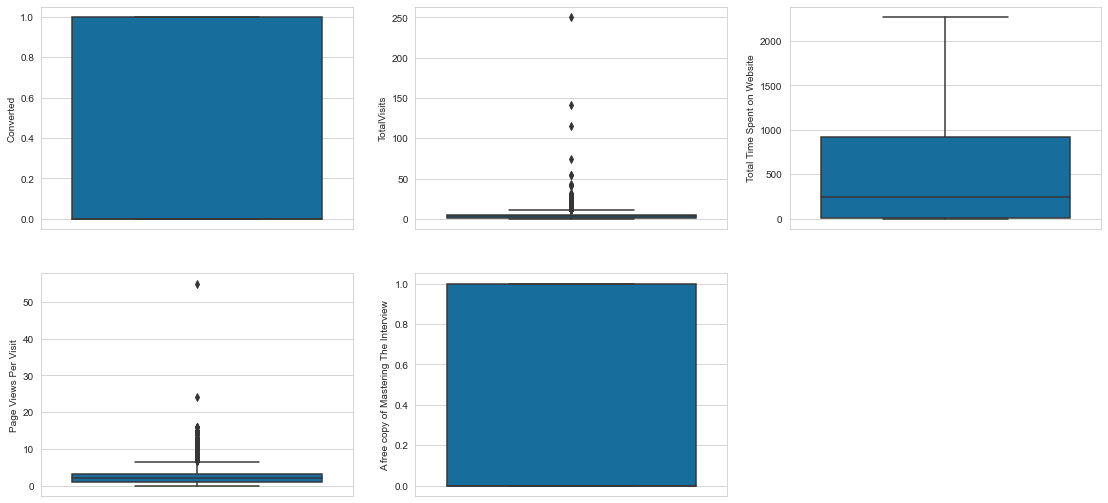

In [112]:
# To Check for Outliers in "lead_score" df.

num_var = [ 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview']

plt.figure(figsize=(19,9))
plt.subplot(2,3,1)
sns.boxplot(y= 'Converted', data = lead_score)
plt.subplot(2,3,2)
sns.boxplot(y= 'TotalVisits', data = lead_score)
plt.subplot(2,3,3)
sns.boxplot(y='Total Time Spent on Website', data = lead_score)
plt.subplot(2,3,4)
sns.boxplot(y='Page Views Per Visit',  data = lead_score)

plt.subplot(2,3,5)
sns.boxplot(y='A free copy of Mastering The Interview',  data = lead_score)

plt.show()

- The variable `Converted` & `Total Time Spent on Website` has no outliers while `TotalVisits` and `Page Views Per Visit`  variables has outliers in the upper data range.
- We can't completely drop these as they may contain potential data.

##### Analysing `Page Views Per Visit`


In [113]:
# Analysing "Page Views Per Visit"
lead_score['Page Views Per Visit'].quantile([0.98,0.99,0.999,0.9999,1])

0.9800     8.0000
0.9900     9.0000
0.9990    14.4635
0.9999    26.8737
1.0000    55.0000
Name: Page Views Per Visit, dtype: float64

In [114]:
# Describe
lead_score['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

- Average number of pages on the website viewed during the visits by the customers.
- A potential customer might have visited the page numerous times before getting converted.

In [115]:
# Outlier treatment
Q1 = lead_score['Page Views Per Visit'].quantile(0.01)
Q3 = lead_score['Page Views Per Visit'].quantile(0.99)
IQR = Q3 - Q1
lead_score = lead_score[(lead_score['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead_score['Page Views Per Visit'] <= Q3 + 1.5*IQR)]


In [116]:
# Describe
lead_score['Page Views Per Visit'].describe()

count    9072.000000
mean        2.361965
std         2.076870
min         0.000000
25%         1.000000
50%         2.000000
75%         3.177500
max        16.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:ylabel='Page Views Per Visit'>

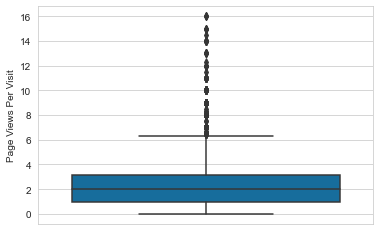

In [117]:
# After treatment of outliers.
sns.boxplot(y='Page Views Per Visit',  data = lead_score)


- After applying outlier treatment, we can see that the number of outliers have decreased.
- Also, we can't completely drop all the outliers as they might contaion some potential insights.

##### Analysing  `TotalVisits`


In [118]:
# Analysing "TotalVisits"
lead_score['TotalVisits'].quantile([0.98,0.99,0.999,0.9999,1])

0.9800     13.000
0.9900     17.000
0.9990     29.929
0.9999    151.219
1.0000    251.000
Name: TotalVisits, dtype: float64

In [119]:
# Describe
lead_score['TotalVisits'].describe()

count    9072.000000
mean        3.448082
std         4.824280
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

- The total number of visits made by the customer on the website.
- A potential customer might have visited the page numerous times before getting converted.


In [120]:
# Outlier treatment
Q1 = lead_score['TotalVisits'].quantile(0.03)
Q3 = lead_score['TotalVisits'].quantile(0.97)
IQR = Q3 - Q1
lead_score = lead_score[(lead_score['TotalVisits'] >= Q1 - 1.5*IQR) & (lead_score['TotalVisits'] <= Q3 + 1.5*IQR)]


In [121]:
# Describe
lead_score['TotalVisits'].describe()

count    9058.000000
mean        3.349967
std         3.361753
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        27.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:ylabel='TotalVisits'>

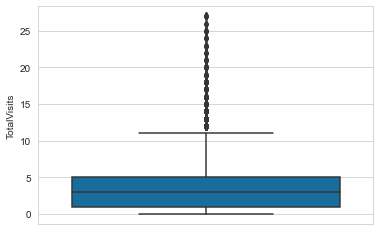

In [122]:
# After treatment of outliers.

sns.boxplot(y='TotalVisits',  data = lead_score)


- After applying outlier treatment, we can see that the number of outliers have decreased.
- Also, we can't completely drop all the outliers as they might contaion some potential insights.

In [123]:
# Outlier treatment-again removing values beyond 99.6% for Total Visits

upper_quartile = lead_score['TotalVisits'].quantile(0.996)
lead_score = lead_score[lead_score["TotalVisits"] < upper_quartile]
lead_score["TotalVisits"].describe(percentiles=[0.75,0.90,0.95,0.99])

count    9015.000000
mean        3.257460
std         3.086136
min         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        14.000000
max        19.000000
Name: TotalVisits, dtype: float64

In [124]:
# Determine the percentage of data retained

num_data = round(100*(len(lead_score)/9240),2)
print(num_data)

97.56


In [125]:
# Reseting the index
lead_score.reset_index(inplace=True)

In [126]:
# Drop extra index column
lead_score.drop('index',axis=1, inplace=True)


In [127]:
# Info()
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9015 non-null   object 
 1   Lead Source                             9015 non-null   object 
 2   Converted                               9015 non-null   int64  
 3   TotalVisits                             9015 non-null   float64
 4   Total Time Spent on Website             9015 non-null   int64  
 5   Page Views Per Visit                    9015 non-null   float64
 6   Last Activity                           9015 non-null   object 
 7   Specialization                          9015 non-null   object 
 8   What is your current occupation         9015 non-null   object 
 9   City                                    9015 non-null   object 
 10  A free copy of Mastering The Interview  9015 non-null   int6

#### Handling incorrect datatypes.

To Check the dataypes and convert them to correct datatypes dataframe `lead_score`.

In [128]:
#Check the datatypes of all the columns 
lead_score.dtypes

Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
City                                       object
A free copy of Mastering The Interview      int64
Last Notable Activity                      object
dtype: object

- The dataypes of all columns are correct.

## Step 2: Data Visualisation

Let's now spend some time doing data visualisation - understanding the data.



### Visualising Numeric Variables
Let's make a histplot of all the numeric variables

In [129]:
# Name the columns which have "Int64", "Float" dtypes.

list(lead_score.select_dtypes(include = ['int64', "float"]))

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview']

In [130]:
# Length of numeric variables
len(list(lead_score.select_dtypes(include = ['int64', "float"])))

5

In [131]:
# List of numeric variables
num_var = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','A free copy of Mastering The Interview']


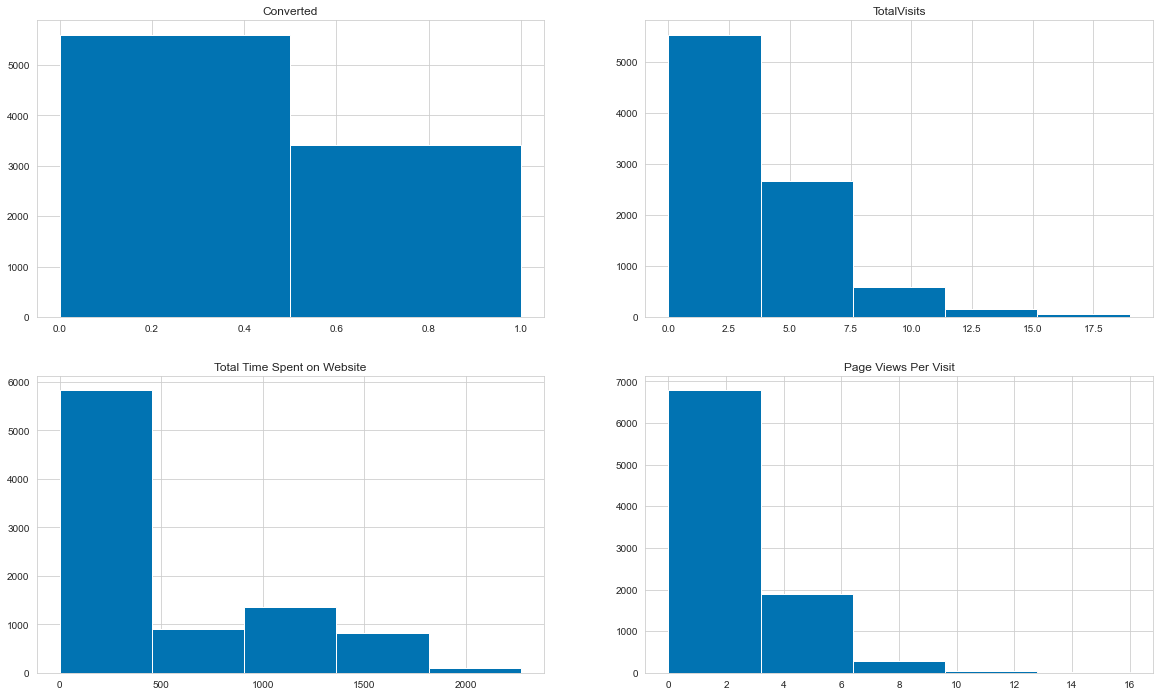

In [132]:
# Visualize numeric variables.

plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
plt.hist(lead_score['Converted'], bins = 2)
plt.title('Converted')


plt.subplot(2,2,2)
plt.hist(lead_score['TotalVisits'], bins = 5)
plt.title('TotalVisits')


plt.subplot(2,2,3)
plt.hist(lead_score['Total Time Spent on Website'], bins = 5)
plt.title('Total Time Spent on Website')


plt.subplot(2,2,4)
plt.hist(lead_score['Page Views Per Visit'], bins = 5)
plt.title('Page Views Per Visit')


plt.show()

**Inferences**
- The count of TotalVisits is very high when the customers visits are low.
- The total time spent by the customer on the website is high during 0 to 500 time spent.
- Overall we can say that many customers visit the website during the initial phase and then the frequency decreases.


##### Bivariate Analysis on Numeric Variables

In [133]:
# Bivariate Analysis of Variables


def plot_num_cat_1(var_1, var_2):
    plt.figure(figsize=[6,4])

# Bar plot for Variable 
    sns.barplot(x = var_2, y = var_1 ,data = lead_score)

# Labelling
    plt.title(f'{var_1} vs {var_2} \n', fontsize=15, fontweight=3)
    plt.xlabel(var_2, fontsize = 12, fontweight=1.5)
    plt.ylabel(var_1, fontsize = 12, fontweight=1.5)
    plt.xticks(rotation = 90, size =12)
    
    
    
    plt.show()

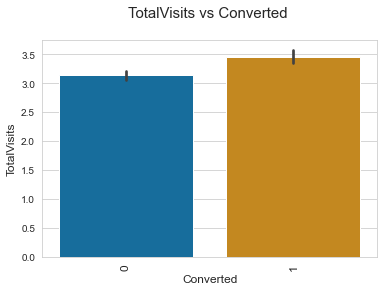

In [134]:
# Plot
plot_num_cat_1('TotalVisits' ,'Converted')

plt.show()

##### Inferences
- The converted are slightly more in `TotalVisits`
- People who have visited more, also have converted more.

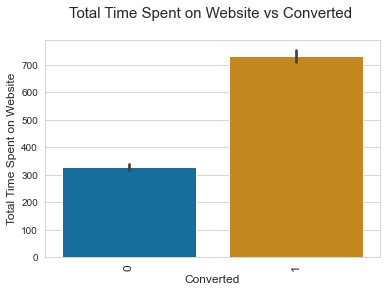

In [135]:
# Plot
plot_num_cat_1('Total Time Spent on Website' ,'Converted')

plt.show()

##### Inferences
- The converted are  more in number in `Total Time Spent on Website`
- Interested leads who have converted tend to spend more on the website.

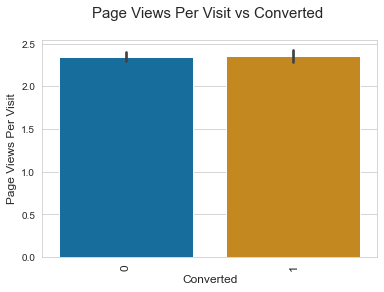

In [136]:
# Plot
plot_num_cat_1('Page Views Per Visit' ,'Converted')

plt.show()

##### Inferences
- The converted and non-converted are equal in `Page Views Per Visit`

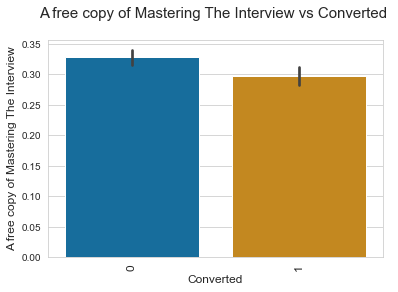

In [137]:
# Plot
plot_num_cat_1('A free copy of Mastering The Interview' ,'Converted')

plt.show()

#### Inferences
- The converted is less than non-converted in `A free copy of Mastering The Interview`

In [138]:
# Correlation Matrix 
lead_score.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
Converted,1.000000,0.050533,0.359027,0.001991,-0.031038
TotalVisits,0.050533,1.000000,0.338762,0.723036,0.279160
Total Time Spent on Website,0.359027,0.338762,1.000000,0.334460,0.178276
Page Views Per Visit,0.001991,0.723036,0.334460,1.000000,0.282403
A free copy of Mastering The Interview,-0.031038,0.279160,0.178276,0.282403,1.000000


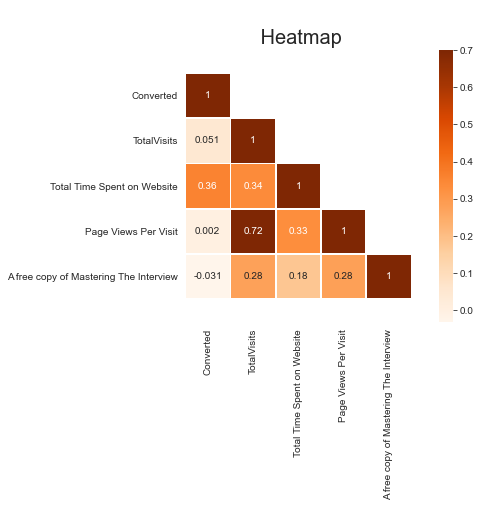

In [139]:
# Create Heatmap between predictor variables and output variable("Converted")
mask = np.array(lead_score.corr())

plt.figure(figsize=[10,5])


mask[np.tril_indices_from(mask)]=False

ax = sns.heatmap(lead_score.corr(), mask=mask, annot=True, cmap='Oranges', vmax= 0.7, square=True, linewidths=0.7)

# Labelling heatmap, x-axis and y-axis.
plt.title('\n Heatmap', fontsize=20, fontweight=3)


bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)

plt.show()

#### Inferences
- A correlation of 0.72 is visible between `TotalVisits` and `Page Views Per Visit`

### Visualising Categorical Variables
Let's analyse  all the categorical variables

In [140]:
# Name the columns which have "object" dtypes.

list(lead_score.select_dtypes(include = ["object"]))


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City',
 'Last Notable Activity']

In [141]:
# Length of categorical columns
len(list(lead_score.select_dtypes(include = ["object"])))

7

##### Bivariate Analysis for Categorical Variables

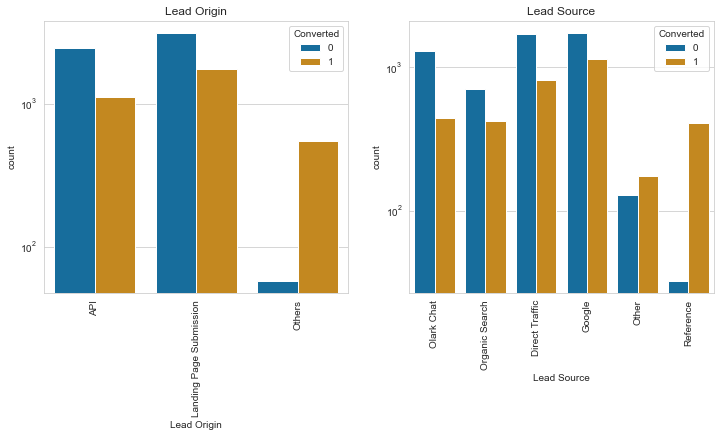

In [142]:
# Visualize categorical variables.

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_score).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.yscale('log')



plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_score).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.yscale('log')


plt.show()

##### Inferences
- In `Lead Origin`, others category has a huge count of converted in comparision to not converted.
- Also, `Lead Source`, conversion is high from reference, other, google.

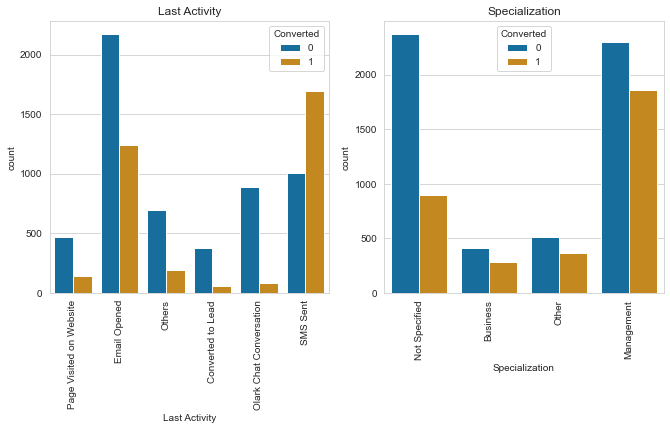

In [143]:
# Visualize categorical variables.

plt.figure(figsize=(11,5))


plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_score).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')


plt.subplot(1,2,2)
sns.countplot(x='Specialization', hue='Converted', data= lead_score).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.show()

##### Inferences
- In `Last Activity` sms sent category has high conversion count and email opened.
- In `Specialization`, customers approaching for management courses are getting converted the most.

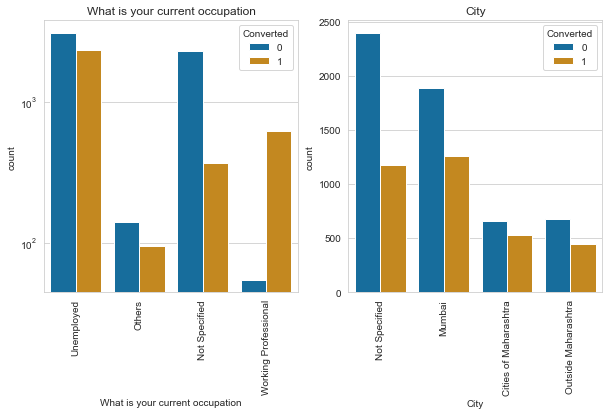

In [144]:
# Visualize categorical variables.

plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_score).tick_params(axis='x', rotation = 90)
plt.yscale('log')
plt.title('What is your current occupation')

plt.subplot(1,2,2)
sns.countplot(x='City', hue='Converted', data= lead_score).tick_params(axis='x', rotation = 90)
plt.title('City')

plt.show()

##### Inferences
- In `current occupation`, unemployed customers have the highest conversion count followed by working professional.
- `City` , mumbai has the highest conversion count.
- Also, many customers have not specified their city but their conversion is also good.

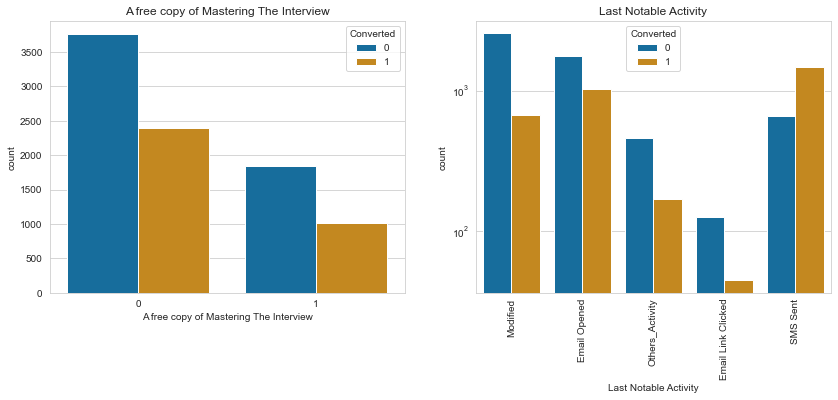

In [145]:
# Visualize categorical variables.

plt.figure(figsize=(14,5))


plt.subplot(1,2,1)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_score)
plt.title('A free copy of Mastering The Interview')


plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_score).tick_params(axis='x', rotation = 90, size=2)
plt.title('Last Notable Activity')
plt.yscale('log')


plt.show()

##### Inferences
- `A free copy of Mastering The Interview`, the count for conversion who don't want free copy is high.
- `Last Notable Activity`, sms sent has the highest conversion count.

In [146]:
# Identify the data imbalance for "Converted" variable in "lead_score" dataframe

lead_score.Converted.value_counts(normalize=True)


0    0.621631
1    0.378369
Name: Converted, dtype: float64

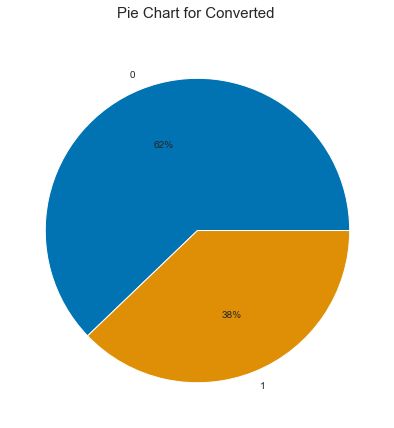

In [147]:
# Pie plot to analyse the Converted variable.
pie_imb = lead_score.Converted.value_counts()

plt.figure(figsize=[10,7])
plt.pie(pie_imb, labels=pie_imb.index,autopct='%1.0f%%')
plt.title("Pie Chart for Converted \n ", fontsize = 15)
plt.show()


##### Inferences
- The conversion rate is only 38%.
- The need is to increase this conversion rate to 80%.

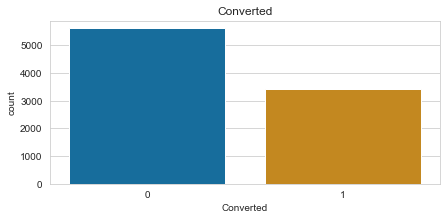

In [148]:
# Visualize categorical variables.

plt.figure(figsize=(7,3))


sns.countplot(x='Converted', data= lead_score)
plt.title('Converted')


plt.show()

##### Inferences
- The count for conversion is approx 3000.
- The need is to increase this conversion rate to 80%.

## Step 3: Data Preparation

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [149]:
# Display 5 rows
lead_score.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Not Specified,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Not Specified,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business,Others,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Other,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Mumbai,0,Modified


##### Lead Origin

In [150]:
# Analyse 'Lead Origin'
lead_score['Lead Origin'].value_counts()

Landing Page Submission    4839
API                        3566
Others                      610
Name: Lead Origin, dtype: int64

In [151]:
# Get the dummy variables for the feature 'Lead Origin' and store it 

# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(lead_score['Lead Origin'], prefix='Lead Origin')

# Dropping Lead Origin_Others column
ml1 = ml.drop(['Lead Origin_Others'], 1)

#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,ml1], axis=1)


In [152]:
# Check what the dataset looks like
lead_score.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Not Specified,0,Modified,1,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Not Specified,0,Email Opened,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business,Others,Mumbai,1,Email Opened,0,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Other,Unemployed,Mumbai,0,Modified,0,1
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Mumbai,0,Modified,0,1


We don't need four columns. We can drop the `Lead Import` column, as the type of Lead Origin can be identified with just the last three columns where —

- 00 will correspond to Others
- 10 will correspond to API
- 01 will correspond to Landing Page Submission


##### Lead Source

In [153]:
# Analyse 'Lead Source'
lead_score['Lead Source'].value_counts()

Google            2859
Direct Traffic    2521
Olark Chat        1752
Organic Search    1135
Reference          442
Other              306
Name: Lead Source, dtype: int64

In [154]:
# # Get the dummy variables for the feature 'Lead Source' and store it 

# # Creating dummy variables for the variable 'Lead Source'
ml = pd.get_dummies(lead_score['Lead Source'], prefix='Lead Source')

# # Dropping Lead Source_Other column
ml1 = ml.drop(['Lead Source_Other'], 1)

# #Adding the results to the master dataframe
lead_score = pd.concat([lead_score,ml1], axis=1)


In [155]:
# Check what the dataset looks like
lead_score.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Not Specified,0,Modified,1,0,0,0,1,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Not Specified,0,Email Opened,1,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business,Others,Mumbai,1,Email Opened,0,1,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Other,Unemployed,Mumbai,0,Modified,0,1,1,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Mumbai,0,Modified,0,1,0,1,0,0,0


- From Lead Source column, Other is dropped.

##### Last Activity	

In [156]:
# Analyse 'Last Activity'
lead_score['Last Activity'].value_counts()

Email Opened               3416
SMS Sent                   2704
Olark Chat Conversation     971
Others                      882
Page Visited on Website     614
Converted to Lead           428
Name: Last Activity, dtype: int64

In [157]:
# # Get the dummy variables for the feature 'Last Activity' and store it 

# # Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(lead_score['Last Activity'], prefix='Last Activity')

# # Dropping Last Activity_Others column
ml1 = ml.drop(['Last Activity_Others'], 1)

# #Adding the results to the master dataframe
lead_score = pd.concat([lead_score,ml1], axis=1)


In [158]:
# Check what the dataset looks like
lead_score.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Not Specified,0,Modified,1,0,0,0,1,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Not Specified,0,Email Opened,1,0,0,0,0,1,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business,Others,Mumbai,1,Email Opened,0,1,1,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Other,Unemployed,Mumbai,0,Modified,0,1,1,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Mumbai,0,Modified,0,1,0,1,0,0,0,1,0,0,0,0


- From Last Activity column, Others is dropped.

##### Specialization	

In [159]:
# Analyse 'Specialization'
lead_score['Specialization'].value_counts()

Management       4166
Not Specified    3273
Other             881
Business          695
Name: Specialization, dtype: int64

In [160]:
# # Get the dummy variables for the feature 'Specialization' and store it 

# # Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(lead_score['Specialization'], prefix='Specialization')

# # Dropping Specialization_Not Specified column
ml1 = ml.drop(['Specialization_Not Specified'], 1)

# #Adding the results to the master dataframe
lead_score = pd.concat([lead_score,ml1], axis=1)


In [161]:
# Check what the dataset looks like
lead_score.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Not Specified,0,Modified,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Not Specified,0,Email Opened,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business,Others,Mumbai,1,Email Opened,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Other,Unemployed,Mumbai,0,Modified,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Mumbai,0,Modified,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


- From Specialization column, Not Specified is dropped.

##### City	

In [162]:
# Analyse 'City'
lead_score['City'].value_counts()

Not Specified            3568
Mumbai                   3144
Cities of Maharashtra    1181
Outside Maharashtra      1122
Name: City, dtype: int64

In [163]:
# # Get the dummy variables for the feature 'City' and store it 

# # Creating dummy variables for the variable 'City'
ml = pd.get_dummies(lead_score['City'], prefix='City')

# # Dropping City_Not Specified column
ml1 = ml.drop(['City_Not Specified'], 1)

# #Adding the results to the master dataframe
lead_score = pd.concat([lead_score,ml1], axis=1)


In [164]:
# Check what the dataset looks like
lead_score.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other,City_Cities of Maharashtra,City_Mumbai,City_Outside Maharashtra
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Not Specified,0,Modified,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Not Specified,0,Email Opened,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business,Others,Mumbai,1,Email Opened,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Other,Unemployed,Mumbai,0,Modified,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Mumbai,0,Modified,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


- From City column, Not Specified is dropped.

##### What is your current occupation		

In [165]:
# Analyse 'What is your current occupation'
lead_score['What is your current occupation'].value_counts()

Unemployed              5433
Not Specified           2671
Working Professional     674
Others                   237
Name: What is your current occupation, dtype: int64

In [166]:
# Get the dummy variables for the feature 'What is your current occupation' and store it 

lead_score = pd.get_dummies(data = lead_score, columns=['What is your current occupation'], drop_first=True)

In [167]:
# Check what the dataset looks like
lead_score.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other,City_Cities of Maharashtra,City_Mumbai,City_Outside Maharashtra,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,0,Modified,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Not Specified,0,Email Opened,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business,Mumbai,1,Email Opened,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Other,Mumbai,0,Modified,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Mumbai,0,Modified,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


- From What is your current occupation column, Not Specified is dropped.

##### Last Notable Activity		

In [168]:
# Analyse 'Last Notable Activity'
lead_score['Last Notable Activity'].value_counts()

Modified              3254
Email Opened          2809
SMS Sent              2143
Others_Activity        637
Email Link Clicked     172
Name: Last Notable Activity, dtype: int64

In [169]:
# # Get the dummy variables for the feature 'Last Notable Activity' and store it 

# # Creating dummy variables for the variable 'Last Notable Activity'
ml = pd.get_dummies(lead_score['Last Notable Activity'], prefix='Last Notable Activity')

# # Dropping Last Notable Activity Others_Activity column
ml1 = ml.drop(['Last Notable Activity_Others_Activity'], 1)

# #Adding the results to the master dataframe
lead_score = pd.concat([lead_score,ml1], axis=1)


In [170]:
# Check what the dataset looks like
lead_score.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other,City_Cities of Maharashtra,City_Mumbai,City_Outside Maharashtra,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,0,Modified,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Not Specified,0,Email Opened,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business,Mumbai,1,Email Opened,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Other,Mumbai,0,Modified,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Mumbai,0,Modified,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


- From Last Notable Activity column, Others_Activity is dropped.

##### Dropping the repeated variables

In [171]:
# List of repeated columns to drop
cols = ['Lead Origin','Lead Source','Last Activity','Specialization','City','Last Notable Activity']

In [172]:
# We have created dummies for the below variables, so we can drop them
lead_score = lead_score.drop(cols, axis=1)

In [173]:
# Display the lead_score
lead_score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other,City_Cities of Maharashtra,City_Mumbai,City_Outside Maharashtra,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,5.0,674,2.5,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,0,1.0,305,1.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,1,2.0,1428,1.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [174]:
# Info
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9015 non-null   int64  
 1   TotalVisits                                           9015 non-null   float64
 2   Total Time Spent on Website                           9015 non-null   int64  
 3   Page Views Per Visit                                  9015 non-null   float64
 4   A free copy of Mastering The Interview                9015 non-null   int64  
 5   Lead Origin_API                                       9015 non-null   uint8  
 6   Lead Origin_Landing Page Submission                   9015 non-null   uint8  
 7   Lead Source_Direct Traffic                            9015 non-null   uint8  
 8   Lead Source_Google                                    9015

In [175]:
# Shape
lead_score.shape

(9015, 30)

##### Rechecking for Outliers

In [176]:
# Checking for outliers in the continuous variables
num_lead_score = lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','A free copy of Mastering The Interview']]

In [177]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead_score.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9015.000000,9015.000000,9015.000000,9015.000000
mean,3.257460,481.678092,2.348163,0.316362
std,3.086136,544.977748,2.061263,0.465082
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,9.500000,1.000000,0.000000
50%,3.000000,245.000000,2.000000,0.000000
75%,5.000000,920.000000,3.000000,1.000000
90%,7.000000,1372.600000,5.000000,1.000000
95%,9.000000,1556.300000,6.000000,1.000000
99%,14.000000,1838.720000,9.000000,1.000000


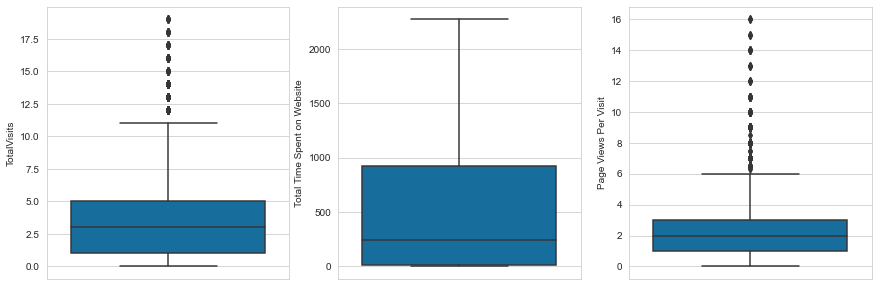

In [178]:
# To Check for Outliers in "lead_score" df.

num_var = [ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.boxplot(y= 'TotalVisits', data = lead_score)
plt.subplot(1,4,2)
sns.boxplot(y='Total Time Spent on Website', data = lead_score)
plt.subplot(1,4,3)
sns.boxplot(y='Page Views Per Visit',  data = lead_score)


plt.show()

- From the distribution shown above, you can see that there outliers in the data but they are reduced considerably.
- But we can't remove them completely as may contain potential customers. 


#### Checking for Missing Values and Inputing Them

In [179]:
# Adding up the missing values (column-wise)
lead_score.isnull().sum()

Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
A free copy of Mastering The Interview                  0
Lead Origin_API                                         0
Lead Origin_Landing Page Submission                     0
Lead Source_Direct Traffic                              0
Lead Source_Google                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Reference                                   0
Last Activity_Converted to Lead                         0
Last Activity_Email Opened                              0
Last Activity_Olark Chat Conversation                   0
Last Activity_Page Visited on Website                   0
Last Activity_SMS Sent                                  0
Specialization

In [180]:
# Checking the percentage of missing values
round(100*(lead_score.isnull().sum()/len(lead_score.index)), 2)

Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
A free copy of Mastering The Interview                  0.0
Lead Origin_API                                         0.0
Lead Origin_Landing Page Submission                     0.0
Lead Source_Direct Traffic                              0.0
Lead Source_Google                                      0.0
Lead Source_Olark Chat                                  0.0
Lead Source_Organic Search                              0.0
Lead Source_Reference                                   0.0
Last Activity_Converted to Lead                         0.0
Last Activity_Email Opened                              0.0
Last Activity_Olark Chat Conversation                   0.0
Last Activity_Page Visited on Website                   0.0
Last Activity_SMS Sent                  

- Now we don't have any missing values
- The data is cleaned and good for modelling.

## Step 4: Splitting the Data into Training and Testing Sets

Let's perform the first basic step for regression i.e. a train-test split.

In [181]:
# Info
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9015 non-null   int64  
 1   TotalVisits                                           9015 non-null   float64
 2   Total Time Spent on Website                           9015 non-null   int64  
 3   Page Views Per Visit                                  9015 non-null   float64
 4   A free copy of Mastering The Interview                9015 non-null   int64  
 5   Lead Origin_API                                       9015 non-null   uint8  
 6   Lead Origin_Landing Page Submission                   9015 non-null   uint8  
 7   Lead Source_Direct Traffic                            9015 non-null   uint8  
 8   Lead Source_Google                                    9015

In [182]:
# Display the lead_score
lead_score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other,City_Cities of Maharashtra,City_Mumbai,City_Outside Maharashtra,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,5.0,674,2.5,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,0,1.0,305,1.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,1,2.0,1428,1.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [183]:
# Putting Converted into to y dataframe

y = lead_score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [184]:
# Putting feature variable to X
X = lead_score.drop('Converted',axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other,City_Cities of Maharashtra,City_Mumbai,City_Outside Maharashtra,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5.0,674,2.5,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2.0,1532,2.0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,1.0,305,1.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,2.0,1428,1.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [185]:
# We specify this so that the train and test data set always have the same rows, respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


- The lead_score df is splitted in the ratio of 70:30, where train = 0.7 and test = 0.3

In [186]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(6310, 29)
(2705, 29)


In [187]:
# Display train dataset.
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other,City_Cities of Maharashtra,City_Mumbai,City_Outside Maharashtra,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
6640,2.0,247,2.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6433,2.0,228,2.0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
4814,3.0,1360,3.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1
8999,4.0,455,4.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
5542,2.0,1488,2.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1


## Step 5: Feature Scaling

##### Rescaling the Features

We can see that all the columns have different integer values.
So it is extremely important to rescale the variables so that they have a comparable scale.  

So, let's use Min_Max Scale (Normalization) so that the units of the coefficients obtained are all on the same scale. Also, this method takes care of outliers.

In [188]:
# MinMaxScaler scale
scaler = MinMaxScaler()

In [189]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [190]:
# Display 5 rows of lead_score_X_train set.
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other,City_Cities of Maharashtra,City_Mumbai,City_Outside Maharashtra,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
6640,0.105263,0.108715,0.1250,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6433,0.105263,0.100352,0.1250,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
4814,0.157895,0.598592,0.1875,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1
8999,0.210526,0.200264,0.2500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
5542,0.105263,0.654930,0.1250,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1


In [191]:
# Checking the Conversion Rate
conversion_rate = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
conversion_rate

37.8369384359401

- We have almost 38% conversion_rate

###### Looking at Correlations

In [192]:
# Let's see the correlation matrix 
lead_score.corr()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other,City_Cities of Maharashtra,City_Mumbai,City_Outside Maharashtra,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
Converted,1.000000,0.050533,0.359027,0.001991,-0.031038,-0.112855,-0.036663,-0.071788,0.028134,-0.124799,-0.001689,0.256085,-0.116098,-0.023814,-0.209824,-0.081090,0.337364,0.018036,0.131075,0.025154,0.053652,0.034270,0.016262,0.009044,0.127283,0.316529,-0.033571,-0.014242,-0.263934,0.361691
TotalVisits,0.050533,1.000000,0.338762,0.723036,0.279160,-0.293689,0.419912,0.118045,0.191708,-0.464388,0.291451,-0.222701,-0.098071,0.056351,-0.201981,0.225706,0.016773,0.097035,0.217262,0.154241,0.115478,0.256258,0.114676,-0.015955,0.071562,0.002661,-0.011635,0.074336,-0.146002,0.016573
Total Time Spent on Website,0.359027,0.338762,1.000000,0.334460,0.178276,-0.199188,0.294058,0.141968,0.216633,-0.379962,0.101461,-0.163108,-0.008286,0.009032,-0.192330,0.029112,0.131668,0.066154,0.210273,0.070674,0.108511,0.175916,0.080808,-0.000129,0.086140,0.097103,-0.036140,0.016938,-0.127086,0.138331
Page Views Per Visit,0.001991,0.723036,0.334460,1.000000,0.282403,-0.367134,0.504748,0.137639,0.222519,-0.524975,0.311681,-0.243210,-0.065719,0.063785,-0.236638,0.103118,0.075506,0.103823,0.249138,0.171243,0.129513,0.274767,0.140715,-0.024577,0.086320,-0.009223,-0.026670,0.070710,-0.104120,0.064468
A free copy of Mastering The Interview,-0.031038,0.279160,0.178276,0.282403,1.000000,-0.489339,0.564023,0.599702,-0.324178,-0.300352,0.141594,-0.137893,0.026468,0.038011,-0.192493,0.056573,0.031002,0.127987,0.321516,0.172126,0.110548,0.295470,0.273160,-0.005930,0.067366,-0.001113,0.011483,0.052706,-0.073224,0.026916
Lead Origin_API,-0.112855,-0.293689,-0.199188,-0.367134,-0.489339,1.000000,-0.870823,-0.450460,0.011254,0.605976,0.002760,-0.183686,-0.008855,-0.044539,0.363620,-0.064722,-0.132481,-0.178529,-0.520505,-0.197479,-0.223330,-0.472515,-0.230098,-0.003897,-0.122895,-0.094542,0.018180,-0.057376,0.121316,-0.109618
Lead Origin_Landing Page Submission,-0.036663,0.419912,0.294058,0.504748,0.564023,-0.870823,1.000000,0.526268,0.080963,-0.528697,0.048793,-0.244423,0.038979,0.041906,-0.313006,0.083374,0.065328,0.189265,0.502327,0.211338,0.224214,0.501034,0.259948,-0.001689,0.092154,-0.001509,-0.020041,0.060619,-0.084140,0.053668
Lead Source_Direct Traffic,-0.071788,0.118045,0.141968,0.137639,0.599702,-0.450460,0.526268,1.000000,-0.424608,-0.306013,-0.236464,-0.141473,0.061959,0.016166,-0.176612,0.057191,0.016633,0.093254,0.268680,0.096242,0.115544,0.227556,0.180614,0.030468,0.045298,-0.008909,0.007048,0.028003,-0.043208,0.018417
Lead Source_Google,0.028134,0.191708,0.216633,0.222519,-0.324178,0.011254,0.080963,-0.424608,1.000000,-0.334709,-0.258638,-0.154740,0.026078,0.030786,-0.090684,0.021078,0.012723,0.011250,0.078315,-0.032429,0.044832,0.133503,-0.106746,-0.033017,0.030682,-0.014275,-0.039287,0.025301,-0.005940,-0.002591
Lead Source_Olark Chat,-0.124799,-0.464388,-0.379962,-0.524975,-0.300352,0.605976,-0.528697,-0.306013,-0.334709,1.000000,-0.186399,-0.111520,-0.109650,-0.043845,0.423460,-0.094946,-0.125720,-0.116728,-0.351782,-0.130484,-0.152477,-0.310591,-0.138468,0.013913,-0.154598,-0.085255,0.044207,-0.050789,0.100750,-0.099755


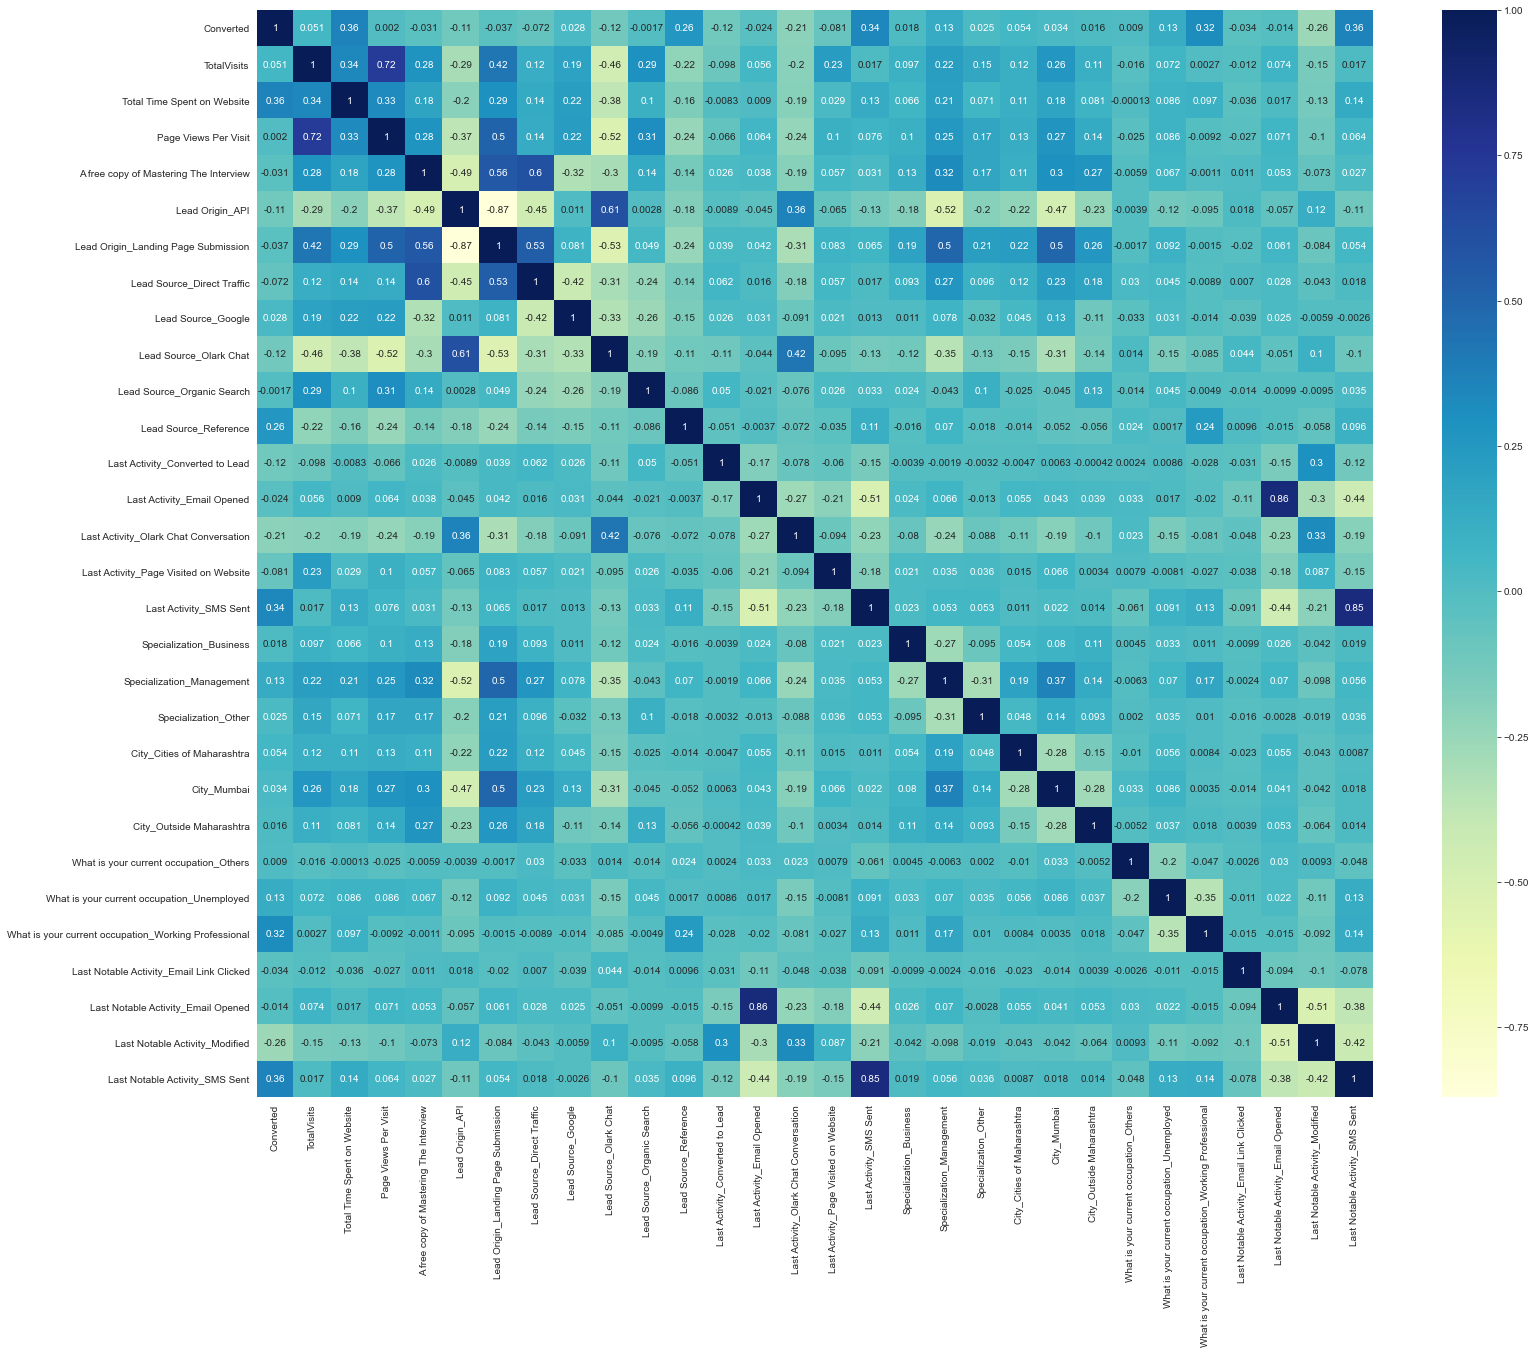

In [193]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,20))        # Size of the figure
sns.heatmap(lead_score.corr(),annot = True, cmap='YlGnBu')
plt.show()

##### Dropping highly correlated dummy variables

In [194]:
# columns pairs in order of highest absolute correlation
X_train.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

Last Notable Activity_SMS Sent          Last Notable Activity_SMS Sent            1.000000
Lead Origin_Landing Page Submission     Lead Origin_API                           0.865521
Last Notable Activity_Email Opened      Last Activity_Email Opened                0.861287
Last Notable Activity_SMS Sent          Last Activity_SMS Sent                    0.843861
TotalVisits                             Page Views Per Visit                      0.719153
Lead Origin_API                         Lead Source_Olark Chat                    0.608153
Lead Source_Direct Traffic              A free copy of Mastering The Interview    0.607417
A free copy of Mastering The Interview  Lead Origin_Landing Page Submission       0.563063
Lead Source_Olark Chat                  Lead Origin_Landing Page Submission       0.526369
Lead Origin_Landing Page Submission     Lead Source_Direct Traffic                0.524855
Specialization_Management               Lead Origin_API                           0.523699

In [195]:
# Drop highly correlated columns.
X_test = X_test.drop(['Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Lead Origin_Landing Page Submission'], 1)
X_train = X_train.drop(['Last Notable Activity_SMS Sent','Lead Origin_Landing Page Submission','Last Notable Activity_Email Opened'], 1)

##### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

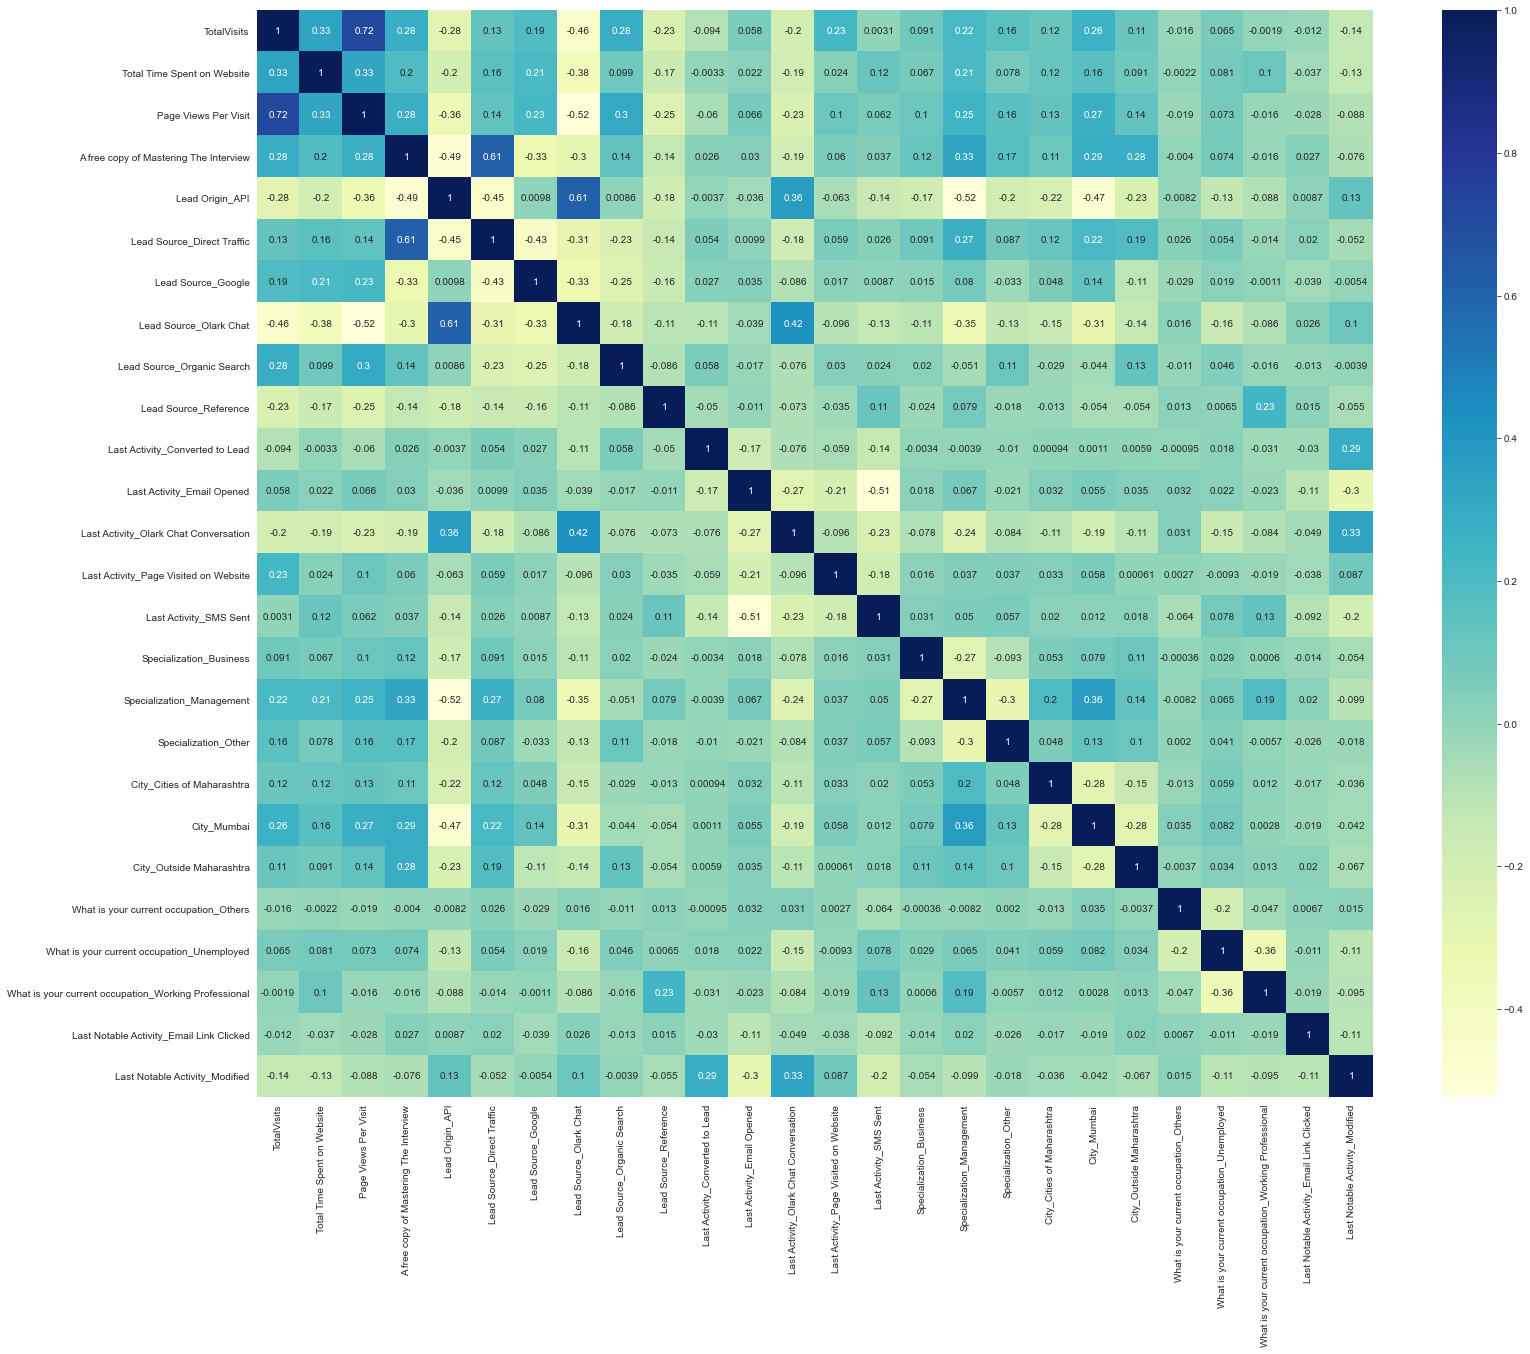

In [196]:
# Heatmaps
plt.figure(figsize = (25,20))
sns.heatmap(X_train.corr(),annot = True, cmap='YlGnBu')
plt.show()

## Step 6: Model Building
Let's start by splitting our data into a training set and a test set.

##### Running the Initial Training Model

In [197]:
# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.4
Date:                Wed, 13 Oct 2021   Deviance:                       5214.7
Time:                        18:00:21   Pearson chi2:                 6.31e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7030      0.242     -7.028      0.000      -2.178      -1.228
TotalVisits                                              1.4713      0.315      4.675      0.000       0.854       2.088
Total Time Spent on Website                              4.3838      0.171     25.703      0.000       4.049       4.718
Page Views Per Visit                                    -2.4968      0.426     -5.863      0.000      -3.331      -1.662
A free copy of Mastering The Interview                  -0.2925      0.110     -2.663      0.008      -0.508      -0.077
Lead Origin_API                                          0.2553      0.140      1.822      0.068      -0.019       0.530
Lead Source_Direct Traffic                              -2.4337      0.195    -12.467      0.000      -2.816      -2.051
Lead Source_Google                                      -2.0934      0.187    -11.185      0.000      -2.460      -1.727
Lead Source_Olark Chat                                  -0.9775      0.204     -4.799      0.000      -1.377      -0.578
Lead Source_Organic Search                              -2.1273      0.207    -10.287      0.000      -2.533      -1.722
Lead Source_Reference                                    1.5254      0.290      5.257      0.000       0.957       2.094
Last Activity_Converted to Lead                         -0.3159      0.262     -1.205      0.228      -0.830       0.198
Last Activity_Email Opened                               0.5408      0.156      3.465      0.001       0.235       0.847
Last Activity_Olark Chat Conversation                   -0.5574      0.214     -2.601      0.009      -0.977      -0.137
Last Activity_Page Visited on Website                   -0.1344      0.205     -0.656      0.512      -0.536       0.267
Last Activity_SMS Sent                                   1.7597      0.158     11.159      0.000       1.451       2.069
Specialization_Business                                  0.4211      0.195      2.157      0.031       0.038       0.804
Specialization_Management                                0.4813      0.162      2.973      0.003       0.164       0.799
Specialization_Other                                     0.5126      0.191      2.678      0.007       0.137       0.888
City_Cities of Maharashtra                               0.1957      0.187      1.049      0.294      -0.170       0.561
City_Mumbai                                              0.1875      0.175      1.069      0.285      -0.156       0.531
City_Outside Maharashtra                                 0.2719      0.191      1.426      0.154      -0.102       0.645
What is your current occupation_Others                   1

### Feature Selection Using RFE

#### Recursive feature elimination (RFE)
Recursive feature elimination:-This is a feature selection method that builds & fits a model and removes the weakest features  until the specified number of features is reached.
 

In [198]:
# Build Logistic Regression model using sklearn.

lm = LogisticRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15 using automated approched

rfe = RFE(lm, 15)             # running RFE
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [199]:
# List of columns selected by RFE with their ranking and support(True or False)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 6),
 ('Lead Origin_API', False, 8),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Converted to Lead', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business', False, 5),
 ('Specialization_Management', False, 4),
 ('Specialization_Other', False, 3),
 ('City_Cities of Maharashtra', False, 10),
 ('City_Mumbai', False, 11),
 ('City_Outside Maharashtra', False, 9),
 ('What is your current occupation_Others', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupatio

In [200]:
# List of selected columns on the basis of RFE_Support.
X_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

In [201]:
# Length of selected columns on the basis of RFE_Support.
len(X_train.columns[rfe.support_])

15

In [202]:
# List of not selected columns on the basis of RFE_Support.
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Origin_API',
       'Last Activity_Converted to Lead',
       'Last Activity_Page Visited on Website', 'Specialization_Business',
       'Specialization_Management', 'Specialization_Other',
       'City_Cities of Maharashtra', 'City_Mumbai', 'City_Outside Maharashtra',
       'Last Notable Activity_Email Link Clicked'],
      dtype='object')

In [203]:
# Length of selected columns on the basis of RFE_Support.
len(X_train.columns[~rfe.support_])

11

In [204]:
# Assign the indep data to variable 'A' and target to variable 'B'
A = X_train
   
B = y_train

names = list(X_train.columns)

In [205]:
# Dataframe
inp_df = pd.DataFrame(A, columns=names)

In [206]:
# Dsiplay 5 rows
inp_df.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_Management,Specialization_Other,City_Cities of Maharashtra,City_Mumbai,City_Outside Maharashtra,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified
6640,0.105263,0.108715,0.1250,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6433,0.105263,0.100352,0.1250,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4814,0.157895,0.598592,0.1875,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
8999,0.210526,0.200264,0.2500,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
5542,0.105263,0.654930,0.1250,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0


In [207]:
# Info
inp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6310 entries, 6640 to 5640
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6310 non-null   float64
 1   Total Time Spent on Website                           6310 non-null   float64
 2   Page Views Per Visit                                  6310 non-null   float64
 3   A free copy of Mastering The Interview                6310 non-null   int64  
 4   Lead Origin_API                                       6310 non-null   uint8  
 5   Lead Source_Direct Traffic                            6310 non-null   uint8  
 6   Lead Source_Google                                    6310 non-null   uint8  
 7   Lead Source_Olark Chat                                6310 non-null   uint8  
 8   Lead Source_Organic Search                            6

In [208]:
# Names of columns
print(names)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_API', 'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Reference', 'Last Activity_Converted to Lead', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Business', 'Specialization_Management', 'Specialization_Other', 'City_Cities of Maharashtra', 'City_Mumbai', 'City_Outside Maharashtra', 'What is your current occupation_Others', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Modified']


In [209]:
# VIF value for each feature.

for i in range(0, len(names)):
    b = inp_df.loc[:, inp_df.columns == names[i]]
    a = inp_df.loc[:, inp_df.columns != names[i]]
    model = sm.OLS(b, a)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
   # print(
  #      "R Square value of {} column is {} keeping all other columns as features".format(
  #          names[i], (round(rsq, 2))
  #      )
  #  )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names[i], vif)
        )

Variance Inflation Factor of TotalVisits column is 5.08 

Variance Inflation Factor of Total Time Spent on Website column is 2.42 

Variance Inflation Factor of Page Views Per Visit column is 5.91 

Variance Inflation Factor of A free copy of Mastering The Interview column is 3.29 

Variance Inflation Factor of Lead Origin_API column is 0.43 

Variance Inflation Factor of Lead Source_Direct Traffic column is 0.98 

Variance Inflation Factor of Lead Source_Google column is 0.86 

Variance Inflation Factor of Lead Source_Olark Chat column is 0.89 

Variance Inflation Factor of Lead Source_Organic Search column is 0.01 

Variance Inflation Factor of Lead Source_Reference column is 0.37 

Variance Inflation Factor of Last Activity_Converted to Lead column is 0.14 

Variance Inflation Factor of Last Activity_Email Opened column is 0.16 

Variance Inflation Factor of Last Activity_Olark Chat Conversation column is 0.6 

Variance Inflation Factor of Last Activity_Page Visited on Website colum

### Manual Feature Elimination
This is a feature selection method that builds & fits a model using statsmodel.api utility.

##### Assessing the model with StatsModels

##### Model 1

In [210]:
# List of columns rfe supported
# Creating X_train_rfe dataframe with RFE selected variables

col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Source_Direct Traffic', 'Lead Source_Google','Lead Source_Olark Chat', 'Lead Source_Organic Search','Lead Source_Reference', 'Last Activity_Email Opened','Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent','What is your current occupation_Others','What is your current occupation_Unemployed','What is your current occupation_Working Professional','Last Notable Activity_Modified']


In [211]:
# Add a constant variable.

X_train_sm = sm.add_constant(X_train[col])

# Create a first fitted model

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

# Print a summary of the linear regression model obtained

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.4
Date:                Wed, 13 Oct 2021   Deviance:                       5248.9
Time:                        18:00:22   Pearson chi2:                 6.32e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5920      0.203     -7.837      0.000      -1.990      -1.194
TotalVisits                                              1.5510      0.300      5.164      0.000       0.962       2.140
Total Time Spent on Website                              4.4134      0.169     26.178      0.000       4.083       4.744
Page Views Per Visit                                    -2.1458      0.415     -5.171      0.000      -2.959      -1.332
Lead Source_Direct Traffic                              -2.2764      0.176    -12.898      0.000      -2.622      -1.931
Lead Source_Google                                      -1.8192      0.174    -10.427      0.000      -2.161      -1.477
Lead Source_Olark Chat                                  -0.7764      0.181     -4.284      0.000      -1.132      -0.421
Lead Source_Organic Search                              -2.0066      0.195    -10.268      0.000      -2.390      -1.624
Lead Source_Reference                                    1.7792      0.286      6.214      0.000       1.218       2.340
Last Activity_Email Opened                               0.5828      0.107      5.461      0.000       0.374       0.792
Last Activity_Olark Chat Conversation                   -0.5603      0.182     -3.070      0.002      -0.918      -0.203
Last Activity_SMS Sent                                   1.7827      0.110     16.203      0.000       1.567       1.998
What is your current occupation_Others                   1.5044      0.215      6.999      0.000       1.083       1.926
What is your current occupation_Unemployed               1.2686      0.088     14.456      0.000       1.097       1.441
What is your current occupation_Working Professional     3.5724      0.193     18.499      0.000       3.194       3.951
Last Notable Activity_Modified                          -0.6612      0.085     -7.737      0.000      -0.829      -0.494
========================================================================================================================
"""

###### Inferences:- 
- All the p-values are below 0.05. So we will check the VIF values for signs of multicollinearity within predictor variables. 
 
We first need to drop one feature from our model but let's check the VIF before dropping any feature.


In [212]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.72
0,TotalVisits,4.66
4,Lead Source_Google,4.40
3,Lead Source_Direct Traffic,3.76
12,What is your current occupation_Unemployed,3.01
8,Last Activity_Email Opened,2.92
6,Lead Source_Organic Search,2.60
5,Lead Source_Olark Chat,2.57
10,Last Activity_SMS Sent,2.56
1,Total Time Spent on Website,2.38


##### Inferences
- VIF helps us to identify the multicollinearity between predictor variables.
- The feature `Page Views Per Visit` have very high VIF value but their p-value is very low. This means that there is strong correlation between  independent variables.
- To solve this problem we need to drop one of the variables from the dataset which is making beta's coefficients.

Before dropping, lets visualize the correlation between predictor variables through heatmaps.

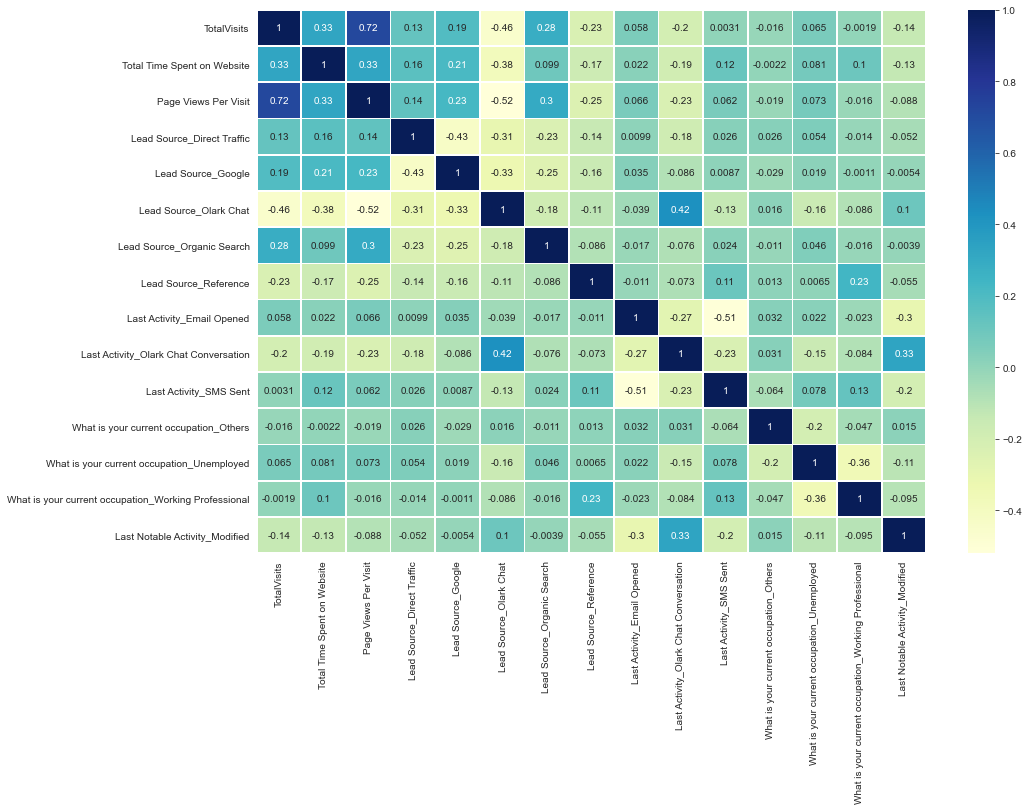

In [213]:
# Let's check the correlation coefficients to see which predictor variables are highly correlated

plt.figure(figsize = (15,10))
sns.heatmap(X_train[col].corr(), annot = True, cmap="YlGnBu", linewidths=0.7)
plt.show()

##### Inferences
- To solve this problem we need to drop one of the variables from the dataset which is making beta's coefficients.
- But let's drop `Page Views Per Visit` feature first on the basis of high VIF value even though p-value is low .


`Page Views Per Visit` variable is insignificant in presence of other variables; so let's dropped it.

##### Model 2
Rebuilding the model without `Page Views Per Visit`; due to high VIF value which signals multicollinearity issue.

In [214]:
# Dropping 'Page Views Per Visit' due to high VIF value which signals multicollinearity issue.
col = ['TotalVisits', 'Total Time Spent on Website','Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search','Lead Source_Reference', 'Last Activity_Email Opened','Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent','What is your current occupation_Others', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional','Last Notable Activity_Modified']

In [215]:
# Add a constant variable.

X_train_sm = sm.add_constant(X_train[col])

# Create a first fitted model

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

# Print a summary of the linear regression model obtained

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.1
Date:                Wed, 13 Oct 2021   Deviance:                       5276.2
Time:                        18:00:25   Pearson chi2:                 6.28e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6426      0.201     -8.174      0.000      -2.037      -1.249
TotalVisits                                              0.6887      0.252      2.738      0.006       0.196       1.182
Total Time Spent on Website                              4.3929      0.168     26.124      0.000       4.063       4.723
Lead Source_Direct Traffic                              -2.3597      0.174    -13.569      0.000      -2.701      -2.019
Lead Source_Google                                      -1.9188      0.171    -11.189      0.000      -2.255      -1.583
Lead Source_Olark Chat                                  -0.6694      0.178     -3.757      0.000      -1.018      -0.320
Lead Source_Organic Search                              -2.1646      0.191    -11.331      0.000      -2.539      -1.790
Lead Source_Reference                                    1.8863      0.284      6.636      0.000       1.329       2.443
Last Activity_Email Opened                               0.5251      0.106      4.964      0.000       0.318       0.732
Last Activity_Olark Chat Conversation                   -0.5871      0.182     -3.226      0.001      -0.944      -0.230
Last Activity_SMS Sent                                   1.7062      0.108     15.739      0.000       1.494       1.919
What is your current occupation_Others                   1.4931      0.216      6.915      0.000       1.070       1.916
What is your current occupation_Unemployed               1.2685      0.087     14.501      0.000       1.097       1.440
What is your current occupation_Working Professional     3.5657      0.192     18.527      0.000       3.188       3.943
Last Notable Activity_Modified                          -0.6849      0.085     -8.051      0.000      -0.852      -0.518
========================================================================================================================
"""

###### Inferences:- 
- All the p-values are below 0.05. So we will check the VIF values for signs of multicollinearity within predictor variables. 
 
We first need to drop one feature from our model but let's check the VIF before dropping any feature.


In [216]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Google,4.20
2,Lead Source_Direct Traffic,3.62
0,TotalVisits,3.12
11,What is your current occupation_Unemployed,3.01
7,Last Activity_Email Opened,2.87
4,Lead Source_Olark Chat,2.54
9,Last Activity_SMS Sent,2.50
5,Lead Source_Organic Search,2.44
1,Total Time Spent on Website,2.38
13,Last Notable Activity_Modified,1.99


##### Inferences:-
- VIF helps us to identify the multicollinearity between predictor variables.
- All the features low VIF value i.e. in acceptable range of VIF value < 5 .

Before dropping, lets visualize the correlation between predictor variables through heatmaps.


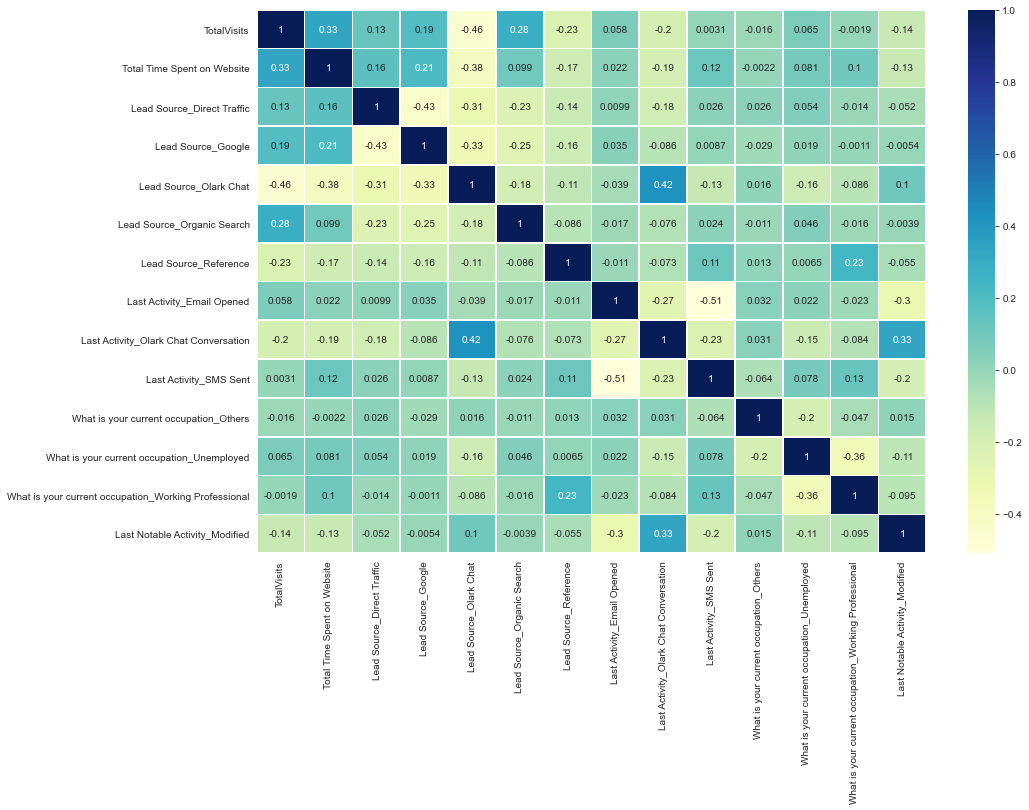

In [217]:
# Let's check the correlation coefficients to see which predictor variables are highly correlated

plt.figure(figsize = (15,10))
sns.heatmap(X_train[col].corr(), annot = True, cmap="YlGnBu", linewidths=0.7)
plt.show()

##### Inferences
- Its visible that `Last Activity_Olark Chat Conversation` and `Lead Source_Olark Chat` have correlation of 0.44.
- But let's drop `Last Activity_Olark Chat Conversation` feature first. 


`Last Activity_Olark Chat Conversation` variable is insignificant in presence of other variables; so let's dropped it.

##### Model 3
Rebuilding the model without `Last Activity_Olark Chat Conversation`

In [218]:
# Dropping 'Last Activity_Olark Chat Conversation'
col = ['TotalVisits', 'Total Time Spent on Website','Lead Source_Direct Traffic', 'Lead Source_Google','Lead Source_Olark Chat', 'Lead Source_Organic Search','Lead Source_Reference', 'Last Activity_Email Opened','Last Activity_SMS Sent','What is your current occupation_Others','What is your current occupation_Unemployed','What is your current occupation_Working Professional','Last Notable Activity_Modified']

In [219]:
# Add a constant variable.

X_train_sm = sm.add_constant(X_train[col])

# Create a first fitted model

logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

# Print a summary of the linear regression model obtained

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.6
Date:                Wed, 13 Oct 2021   Deviance:                       5287.1
Time:                        18:00:28   Pearson chi2:                 6.27e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7717      0.198     -8.951      0.000      -2.160      -1.384
TotalVisits                                              0.7050      0.252      2.793      0.005       0.210       1.200
Total Time Spent on Website                              4.3957      0.169     26.068      0.000       4.065       4.726
Lead Source_Direct Traffic                              -2.3540      0.174    -13.490      0.000      -2.696      -2.012
Lead Source_Google                                      -1.9279      0.172    -11.205      0.000      -2.265      -1.591
Lead Source_Olark Chat                                  -0.7468      0.177     -4.224      0.000      -1.093      -0.400
Lead Source_Organic Search                              -2.1660      0.192    -11.293      0.000      -2.542      -1.790
Lead Source_Reference                                    1.9002      0.285      6.670      0.000       1.342       2.458
Last Activity_Email Opened                               0.6616      0.099      6.706      0.000       0.468       0.855
Last Activity_SMS Sent                                   1.8408      0.102     18.075      0.000       1.641       2.040
What is your current occupation_Others                   1.4858      0.215      6.918      0.000       1.065       1.907
What is your current occupation_Unemployed               1.2792      0.087     14.654      0.000       1.108       1.450
What is your current occupation_Working Professional     3.5944      0.193     18.636      0.000       3.216       3.972
Last Notable Activity_Modified                          -0.7096      0.085     -8.361      0.000      -0.876      -0.543
========================================================================================================================
"""

###### Inferences:- 
- All the p-values are below 0.05. So we will check the VIF values for signs of multicollinearity within predictor variables. 
 
We first need to drop one feature from our model but let's check the VIF before dropping any feature.


In [220]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Google,4.01
2,Lead Source_Direct Traffic,3.52
0,TotalVisits,3.12
10,What is your current occupation_Unemployed,3.01
7,Last Activity_Email Opened,2.52
5,Lead Source_Organic Search,2.39
1,Total Time Spent on Website,2.38
8,Last Activity_SMS Sent,2.26
12,Last Notable Activity_Modified,1.95
4,Lead Source_Olark Chat,1.87


##### Inferences:-
- VIF helps us to identify the multicollinearity between predictor variables.
- All the features low VIF value i.e. in acceptable range of VIF value < 5 .

Before dropping, lets visualize the correlation between predictor variables through heatmaps.


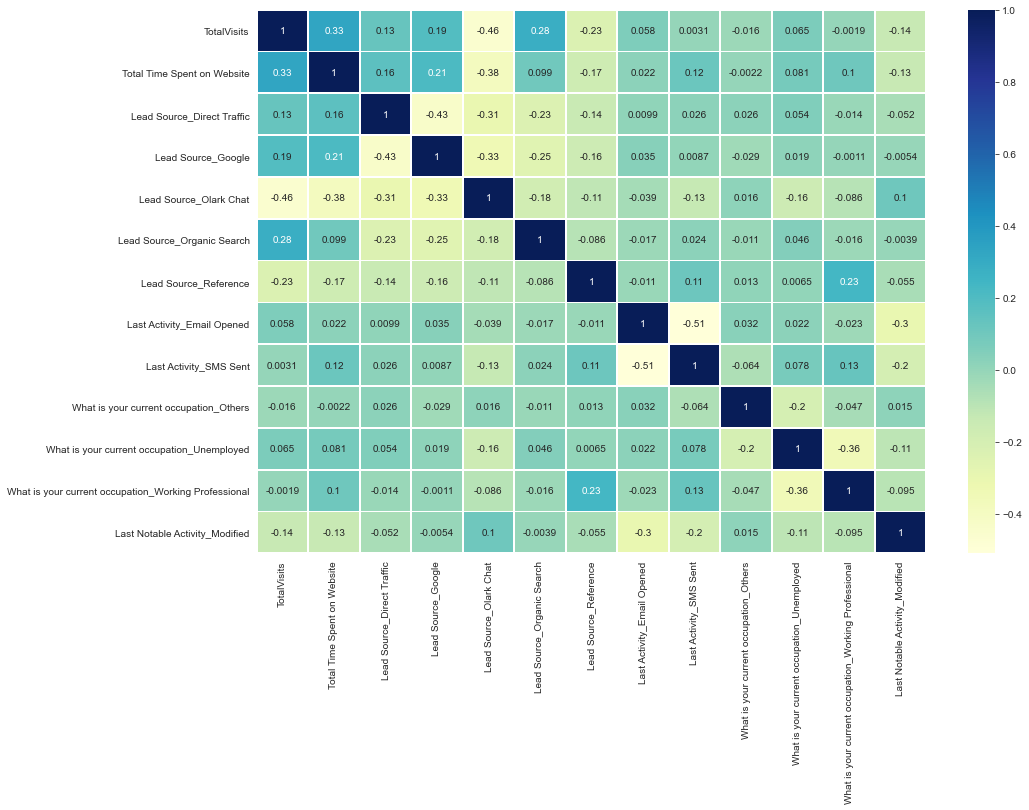

In [221]:
# Let's check the correlation coefficients to see which predictor variables are highly correlated

plt.figure(figsize = (15,10))
sns.heatmap(X_train[col].corr(), annot = True, cmap="YlGnBu", linewidths=0.7)
plt.show()

##### Inferences
- To solve this problem we need to drop one of the variables from the dataset which is making beta's coefficients.
- But let's drop `TotalVisits` feature to improve the model and recreate the model.


`TotalVisits` variable to improve the model ; so let's dropped it.

##### Model 4
Rebuilding the model without `TotalVisits`

In [222]:
# Dropping 'TotalVisits'
col = ['Total Time Spent on Website', 'Last Activity_Email Opened','Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search','Lead Source_Reference', 'Last Activity_SMS Sent','What is your current occupation_Others','What is your current occupation_Unemployed','What is your current occupation_Working Professional','Last Notable Activity_Modified']

In [223]:
# Add a constant variable.

X_train_sm = sm.add_constant(X_train[col])

# Create a first fitted model

logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()

# Print a summary of the linear regression model obtained

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.4
Date:                Wed, 13 Oct 2021   Deviance:                       5294.9
Time:                        18:00:30   Pearson chi2:                 6.28e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6585      0.194     -8.534      0.000      -2.039      -1.278
Total Time Spent on Website                              4.4276      0.168     26.323      0.000       4.098       4.757
Last Activity_Email Opened                               0.6449      0.098      6.558      0.000       0.452       0.838
Lead Source_Direct Traffic                              -2.2995      0.174    -13.213      0.000      -2.641      -1.958
Lead Source_Google                                      -1.8656      0.171    -10.892      0.000      -2.201      -1.530
Lead Source_Olark Chat                                  -0.8202      0.176     -4.671      0.000      -1.164      -0.476
Lead Source_Organic Search                              -2.0468      0.187    -10.921      0.000      -2.414      -1.679
Lead Source_Reference                                    1.8210      0.284      6.413      0.000       1.264       2.378
Last Activity_SMS Sent                                   1.8129      0.101     17.921      0.000       1.615       2.011
What is your current occupation_Others                   1.4752      0.214      6.886      0.000       1.055       1.895
What is your current occupation_Unemployed               1.2748      0.087     14.623      0.000       1.104       1.446
What is your current occupation_Working Professional     3.5840      0.192     18.621      0.000       3.207       3.961
Last Notable Activity_Modified                          -0.7339      0.084     -8.696      0.000      -0.899      -0.569
========================================================================================================================
"""

###### Inferences:- 
- All the p-values are below 0.05. So we will check the VIF values for signs of multicollinearity within predictor variables. 
 
We first need to drop one feature from our model but let's check the VIF before dropping any feature.


In [224]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Google,3.35
2,Lead Source_Direct Traffic,3.01
9,What is your current occupation_Unemployed,3.01
1,Last Activity_Email Opened,2.52
0,Total Time Spent on Website,2.35
7,Last Activity_SMS Sent,2.26
11,Last Notable Activity_Modified,1.94
5,Lead Source_Organic Search,1.88
4,Lead Source_Olark Chat,1.87
6,Lead Source_Reference,1.50


##### Inferences:-
- VIF helps us to identify the multicollinearity between predictor variables.
- All the features low VIF value i.e. in acceptable range of VIF value < 5 .

Before dropping, lets visualize the correlation between predictor variables through heatmaps.


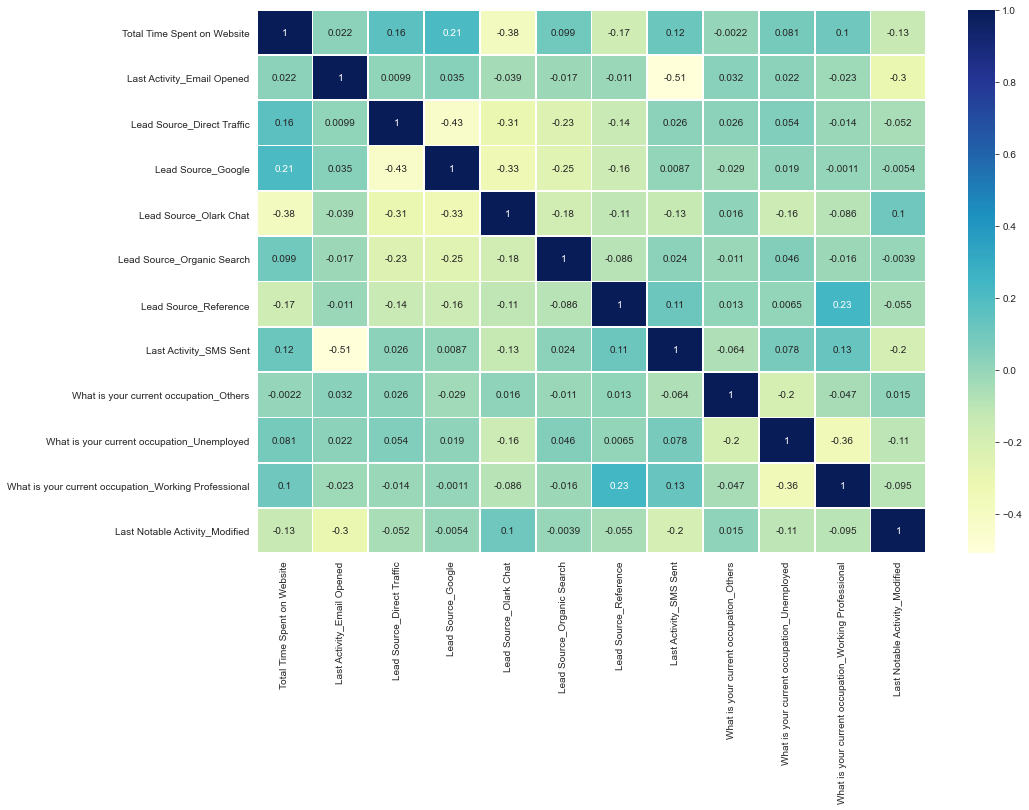

In [225]:
# Let's check the correlation coefficients to see which predictor variables are highly correlated

plt.figure(figsize = (15,10))
sns.heatmap(X_train[col].corr(), annot = True, cmap="YlGnBu", linewidths=0.7)
plt.show()

##### Inferences
- To solve this problem we need to drop one of the variables from the dataset which is making beta's coefficients.
- But let's drop `What is your current occupation_Others` feature to improve the model and recreate the model.


`What is your current occupation_Others` variable to improve the model ; so let's dropped it.

##### Model 5
Rebuilding the model without `What is your current occupation_Others`

In [226]:
# Dropping 'What is your current occupation_Others'
col = ['Total Time Spent on Website', 'Last Activity_Email Opened', 'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search','Lead Source_Reference', 'Last Activity_SMS Sent','What is your current occupation_Unemployed','What is your current occupation_Working Professional','Last Notable Activity_Modified']

In [227]:
# Add a constant variable.

X_train_sm = sm.add_constant(X_train[col])

# Create a first fitted model

logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()

# Print a summary of the linear regression model obtained

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2669.5
Date:                Wed, 13 Oct 2021   Deviance:                       5339.0
Time:                        18:00:32   Pearson chi2:                 6.39e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4999      0.190     -7.875      0.000      -1.873      -1.127
Total Time Spent on Website                              4.4293      0.167     26.450      0.000       4.101       4.758
Last Activity_Email Opened                               0.6439      0.098      6.571      0.000       0.452       0.836
Lead Source_Direct Traffic                              -2.2667      0.172    -13.143      0.000      -2.605      -1.929
Lead Source_Google                                      -1.8568      0.170    -10.934      0.000      -2.190      -1.524
Lead Source_Olark Chat                                  -0.8138      0.174     -4.676      0.000      -1.155      -0.473
Lead Source_Organic Search                              -2.0248      0.186    -10.895      0.000      -2.389      -1.661
Lead Source_Reference                                    1.9544      0.285      6.858      0.000       1.396       2.513
Last Activity_SMS Sent                                   1.7795      0.100     17.740      0.000       1.583       1.976
What is your current occupation_Unemployed               1.1115      0.082     13.637      0.000       0.952       1.271
What is your current occupation_Working Professional     3.4163      0.190     18.005      0.000       3.044       3.788
Last Notable Activity_Modified                          -0.7464      0.084     -8.888      0.000      -0.911      -0.582
========================================================================================================================
"""

###### Inferences:- 
- All the p-values are below 0.05. So we will check the VIF values for signs of multicollinearity within predictor variables. 
 
We first need to drop one feature from our model but let's check the VIF before dropping any feature.


In [228]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Google,3.31
2,Lead Source_Direct Traffic,2.94
8,What is your current occupation_Unemployed,2.86
1,Last Activity_Email Opened,2.52
0,Total Time Spent on Website,2.34
7,Last Activity_SMS Sent,2.26
10,Last Notable Activity_Modified,1.94
5,Lead Source_Organic Search,1.86
4,Lead Source_Olark Chat,1.84
6,Lead Source_Reference,1.48


##### Inferences:-
- VIF helps us to identify the multicollinearity between predictor variables.
- All the features low VIF value i.e. in acceptable range of VIF value < 5 .

Before dropping, lets visualize the correlation between predictor variables through heatmaps.


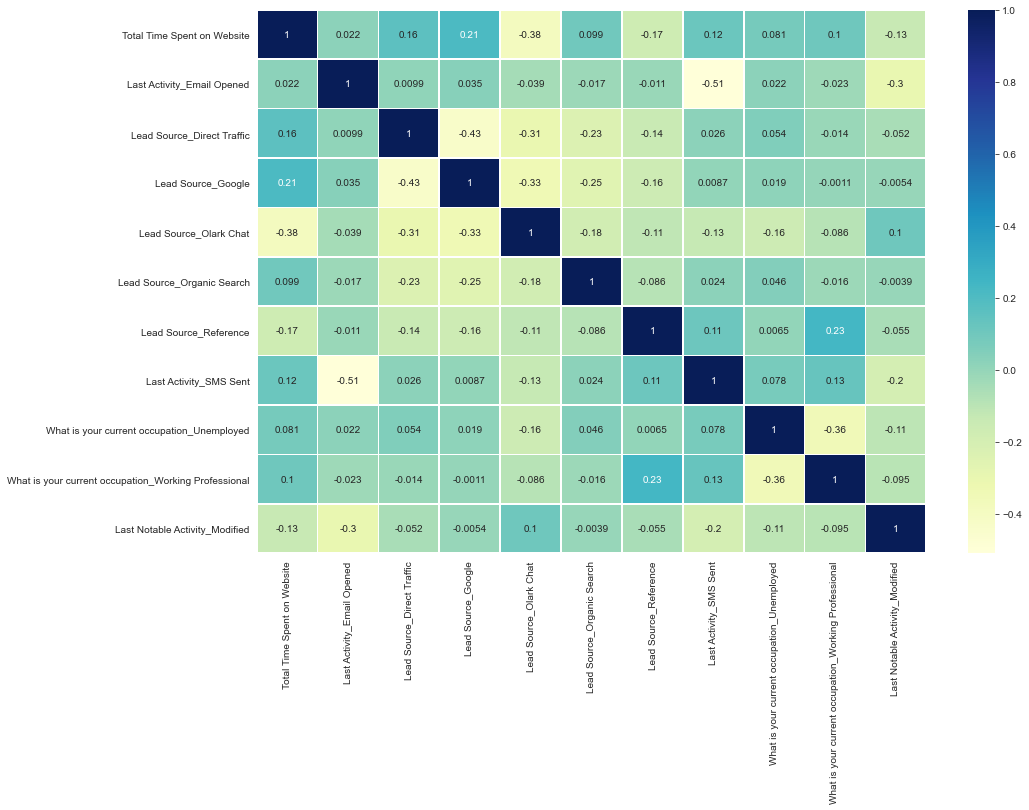

In [229]:
# Let's check the correlation coefficients to see which predictor variables are highly correlated

plt.figure(figsize = (15,10))
sns.heatmap(X_train[col].corr(), annot = True, cmap="YlGnBu", linewidths=0.7)
plt.show()

##### Inferences
- To solve this problem we need to drop one of the variables from the dataset which is making beta's coefficients.
- But let's drop `Lead Source_Olark Chat` feature to improve the model and recreate the model.


`Lead Source_Olark Chat` variable to improve the model ; so let's dropped it.

##### Model 6
Rebuilding the model without `Lead Source_Olark Chat`

In [230]:
# Dropping 'Lead Source_Olark Chat'
col = ['Total Time Spent on Website', 'Last Activity_Email Opened','Lead Source_Direct Traffic', 'Lead Source_Google','Lead Source_Organic Search','Lead Source_Reference', 'Last Activity_SMS Sent','What is your current occupation_Unemployed','What is your current occupation_Working Professional','Last Notable Activity_Modified']

In [231]:
# Add a constant variable.

X_train_sm = sm.add_constant(X_train[col])

# Create a first fitted model

logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()

# Print a summary of the linear regression model obtained

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.6
Date:                Wed, 13 Oct 2021   Deviance:                       5361.2
Time:                        18:00:34   Pearson chi2:                 6.44e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1943      0.119    -18.367      0.000      -2.429      -1.960
Total Time Spent on Website                              4.4860      0.168     26.733      0.000       4.157       4.815
Last Activity_Email Opened                               0.6666      0.098      6.834      0.000       0.475       0.858
Lead Source_Direct Traffic                              -1.6447      0.108    -15.206      0.000      -1.857      -1.433
Lead Source_Google                                      -1.2328      0.104    -11.907      0.000      -1.436      -1.030
Lead Source_Organic Search                              -1.4021      0.128    -10.915      0.000      -1.654      -1.150
Lead Source_Reference                                    2.5905      0.250     10.355      0.000       2.100       3.081
Last Activity_SMS Sent                                   1.8096      0.100     18.111      0.000       1.614       2.005
What is your current occupation_Unemployed               1.1492      0.081     14.189      0.000       0.990       1.308
What is your current occupation_Working Professional     3.4368      0.190     18.094      0.000       3.065       3.809
Last Notable Activity_Modified                          -0.7312      0.084     -8.752      0.000      -0.895      -0.567
========================================================================================================================
"""

###### Inferences:- 
- All the p-values are below 0.05. So we will check the VIF values for signs of multicollinearity within predictor variables. 
 
We first need to drop one feature from our model but let's check the VIF before dropping any feature.


In [232]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,2.67
3,Lead Source_Google,2.48
0,Total Time Spent on Website,2.34
2,Lead Source_Direct Traffic,2.25
1,Last Activity_Email Opened,1.97
6,Last Activity_SMS Sent,1.95
4,Lead Source_Organic Search,1.55
9,Last Notable Activity_Modified,1.42
8,What is your current occupation_Working Profes...,1.37
5,Lead Source_Reference,1.31


##### Inferences:-
- VIF helps us to identify the multicollinearity between predictor variables.
- All the features low VIF value i.e. in acceptable range of VIF value < 5 .

Before dropping, lets visualize the correlation between predictor variables through heatmaps.


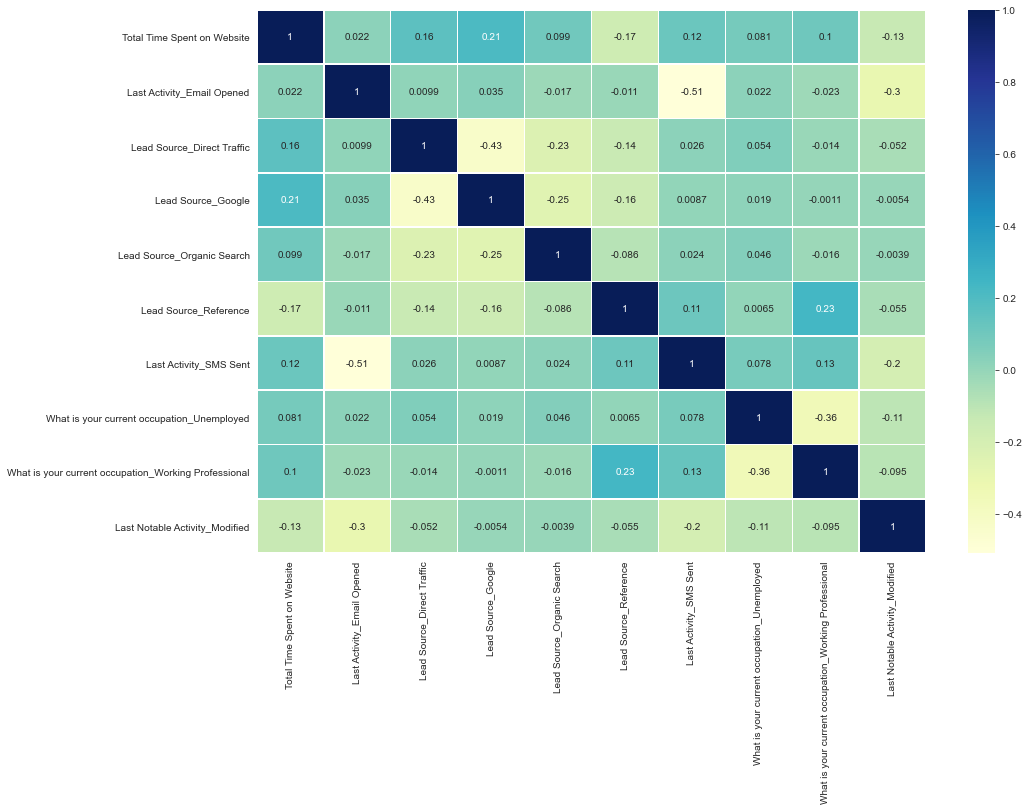

In [233]:
# Let's check the correlation coefficients to see which predictor variables are highly correlated

plt.figure(figsize = (15,10))
sns.heatmap(X_train[col].corr(), annot = True, cmap="YlGnBu", linewidths=0.7)
plt.show()

##### Inferences
- From above heatmap, we can say that all predictor variables have low correlation with each other. (No issue of Multicollinearity)
- We can consider the above model as final model.


## Step 7: Predictions on train set and Other Evaluation Metrics

In [234]:
# Reshaping and predicting the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [235]:
# Display train_predict
y_train_pred[:10]

array([0.02482631, 0.17178185, 0.90175671, 0.10804776, 0.92198503,
       0.6949632 , 0.40647014, 0.23737207, 0.90639465, 0.04090686])

In [236]:
# Adding probablilities to the converted df

y_train_predict_prob = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_predict_prob.head(2)

,Converted,Conv_Prob
0,0,0.024826
1,0,0.171782


In [237]:
# Assigning the predicted value with initial threshold as 0.5(assuming)
y_train_predict_prob['Predicted'] = y_train_predict_prob['Conv_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_predict_prob.head()

,Converted,Conv_Prob,Predicted
0,0,0.024826,0
1,0,0.171782,0
2,1,0.901757,1
3,0,0.108048,0
4,1,0.921985,1


In [238]:
#creating a confusion matrix 
conf = metrics.confusion_matrix(y_train_predict_prob.Converted, y_train_predict_prob.Predicted)
print(conf)

[[3449  457]
 [ 796 1608]]


In [239]:
#ACCURACY
metrics.accuracy_score(y_train_predict_prob.Converted, y_train_predict_prob.Predicted)

0.8014263074484944

In [240]:
#Other EVALUATION METRICS


TP = conf[1,1] # true positive 
TN = conf[0,0] # true negatives
FP = conf[0,1] # false positives
FN = conf[1,0] # false negatives

In [241]:
# sensitivity

print('sensitivity = ',TP/(TP+FN))

sensitivity =  0.6688851913477537


In [242]:
# specificity

print('specificity = ',TN/(TN+FP))

specificity =  0.8830005120327701


In [243]:
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate = ',FP/ float(TN+FP))

false postive rate =  0.1169994879672299


In [244]:
# positive predictive value 
print ('positive predictive value = ',TP / float(TP+FP))

positive predictive value =  0.7786924939467312


In [245]:
# Negative predictive value
print ('Negative predictive value = ',TN / float(TN+ FN))

Negative predictive value =  0.8124852767962308


## Step 8: Plotting the ROC Curve and Finding Optimal Cutoff Point

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [246]:
# ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [247]:
# FPR, TPR, Threshold
fpr, tpr, thresholds = metrics.roc_curve( y_train_predict_prob.Converted, y_train_predict_prob.Conv_Prob, drop_intermediate = False )

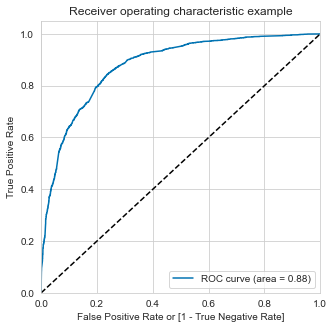

In [248]:
# ROC curve Plot
draw_roc(y_train_predict_prob.Converted, y_train_predict_prob.Conv_Prob)

##### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [249]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predict_prob[i]= y_train_predict_prob.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_predict_prob.head()

,Converted,Conv_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.024826,0,1,0,0,0,0,0,0,0,0,0
1,0,0.171782,0,1,1,0,0,0,0,0,0,0,0
2,1,0.901757,1,1,1,1,1,1,1,1,1,1,1
3,0,0.108048,0,1,1,0,0,0,0,0,0,0,0
4,1,0.921985,1,1,1,1,1,1,1,1,1,1,1


In [250]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci','f_score'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predict_prob.Converted, y_train_predict_prob[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    f_score = 2*((preci*sensi)/(preci+sensi))
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci,f_score]
print(cutoff_df)

     prob  accuracy     sensi     speci     preci   f_score
0.0   0.0  0.380983  1.000000  0.000000  0.380983  0.551756
0.1   0.1  0.614897  0.971714  0.395289  0.497233  0.657843
0.2   0.2  0.746434  0.921381  0.638761  0.610866  0.734660
0.3   0.3  0.788273  0.858985  0.744752  0.674396  0.755580
0.4   0.4  0.800000  0.792013  0.804916  0.714179  0.751085
0.5   0.5  0.801426  0.668885  0.883001  0.778692  0.719624
0.6   0.6  0.793978  0.590682  0.919099  0.817972  0.685990
0.7   0.7  0.764184  0.463810  0.949053  0.848554  0.599785
0.8   0.8  0.742789  0.376456  0.968254  0.879495  0.527236
0.9   0.9  0.704279  0.247504  0.985407  0.912577  0.389398


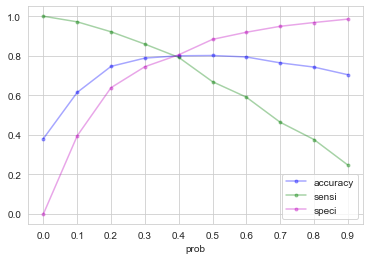

In [251]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],color = 'bgm', marker ='.', alpha =0.35)
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.show()

#### From the curve above, 0.40 is the optimum point to take it as a cutoff probability.

In [252]:
# Predicted Converted after cutoff value
y_train_predict_prob['Conv_predicted'] = y_train_predict_prob.Conv_Prob.map( lambda x: 1 if x > 0.40 else 0)

y_train_predict_prob.head()

,Converted,Conv_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Conv_predicted
0,0,0.024826,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.171782,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.901757,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.108048,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.921985,1,1,1,1,1,1,1,1,1,1,1,1


In [253]:
# Now let us calculate the lead score_rank

y_train_predict_prob['lead_score_rank'] = y_train_predict_prob.Conv_Prob.map(lambda x: round(x*100))
y_train_predict_prob.head(5)

,Converted,Conv_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Conv_predicted,lead_score_rank
0,0,0.024826,0,1,0,0,0,0,0,0,0,0,0,0,2
1,0,0.171782,0,1,1,0,0,0,0,0,0,0,0,0,17
2,1,0.901757,1,1,1,1,1,1,1,1,1,1,1,1,90
3,0,0.108048,0,1,1,0,0,0,0,0,0,0,0,0,11
4,1,0.921985,1,1,1,1,1,1,1,1,1,1,1,1,92


In [254]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

check_lead_rank = y_train_predict_prob.loc[y_train_predict_prob['Converted']==1,['Converted','Conv_predicted']]
check_lead_rank['Conv_predicted'].value_counts()

1    1904
0     500
Name: Conv_predicted, dtype: int64

In [255]:
# check the precentage of Conv_predicted conversions

1904/float(1904+500)


0.7920133111480865

- We can see that the conv_predicted of conversions have a target of 79.20% conversion as per the X Educations CEO's requirement 
- Hence we can conclude that this is a good model.

In [256]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_predict_prob.Converted, y_train_predict_prob.Conv_predicted)

0.8

In [257]:
# #creating a confusion matrix 2

confusion2 = metrics.confusion_matrix(y_train_predict_prob.Converted, y_train_predict_prob.Conv_predicted )
confusion2

array([[3144,  762],
       [ 500, 1904]], dtype=int64)

In [258]:
# Other evaluation metrics
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [259]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7920133111480865

In [260]:
# Let us calculate specificity
TN / float(TN+FP)

0.804915514592934

In [261]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19508448540706605


In [262]:
# Positive predictive value 
print (TP / float(TP+FP))

0.714178544636159


In [263]:
# Negative predictive value
print (TN / float(TN+ FN))

0.862788144895719


### Precision and Recall

In [264]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_predict_prob.Converted, y_train_predict_prob.Conv_predicted )
confusion

array([[3144,  762],
       [ 500, 1904]], dtype=int64)

##### Precision
TP / TP + FP

In [265]:
# Precision 
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.714178544636159

##### Recall
TP / TP + FN

In [266]:
# recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7920133111480865

##### Using sklearn utilities for the same

In [267]:
# Precision 

precision_score(y_train_predict_prob.Converted, y_train_predict_prob.Conv_predicted)

0.714178544636159

In [268]:
# Recall
recall_score(y_train_predict_prob.Converted, y_train_predict_prob.Conv_predicted)

0.7920133111480865

### Precision and recall tradeoff

In [269]:
# Display 
y_train_predict_prob.Converted, y_train_predict_prob.Conv_predicted

(0       0
 1       0
 2       1
 3       0
 4       1
        ..
 6305    0
 6306    1
 6307    0
 6308    0
 6309    0
 Name: Converted, Length: 6310, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 6305    0
 6306    1
 6307    0
 6308    1
 6309    0
 Name: Conv_predicted, Length: 6310, dtype: int64)

In [270]:
# Thresholds
p, r, thresholds = precision_recall_curve(y_train_predict_prob.Converted, y_train_predict_prob.Conv_Prob)

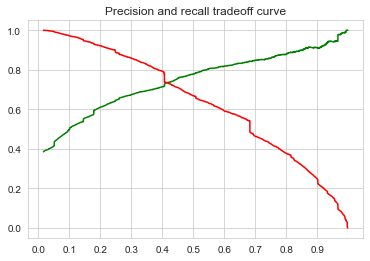

In [271]:
# Plot
plt.plot(thresholds, p[:-1], "g-")              # precision curve
plt.plot(thresholds, r[:-1], "r-")              # recall curve

plt.title('Precision and recall tradeoff curve')
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

plt.show()

##### Inferences
- The Precision and recall tradeoff curve intersects at a threshold of 0.40

## Step 9: Making Predictions Using the Final Model on Test set
Making predictions on the test set

In [272]:
# Transform the test data set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [273]:
# Display test
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Last Activity_Email Opened,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
2712,0.107394,1,0,1,0,0,0,1,0,0
8025,0.607835,0,0,1,0,0,1,1,0,0
1679,0.000000,1,0,0,0,0,0,0,0,0
5109,0.115757,0,0,1,0,0,0,1,0,0
4805,0.000000,0,0,0,0,0,0,0,1,1


In [274]:
# Info
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2705 entries, 2712 to 2782
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Total Time Spent on Website                           2705 non-null   float64
 1   Last Activity_Email Opened                            2705 non-null   uint8  
 2   Lead Source_Direct Traffic                            2705 non-null   uint8  
 3   Lead Source_Google                                    2705 non-null   uint8  
 4   Lead Source_Organic Search                            2705 non-null   uint8  
 5   Lead Source_Reference                                 2705 non-null   uint8  
 6   Last Activity_SMS Sent                                2705 non-null   uint8  
 7   What is your current occupation_Unemployed            2705 non-null   uint8  
 8   What is your current occupation_Working Professional  2

In [275]:
# Add constant
X_test_sm = sm.add_constant(X_test)

## Step 10: Model Evaluation on the test set

In [276]:
# Make prediction on test df
y_test_pred = res.predict(X_test_sm)

In [277]:
# Display test_pred
y_test_pred[:10]

2712    0.244230
8025    0.905369
1679    0.178321
5109    0.146953
4805    0.625091
8094    0.977430
8051    0.987725
688     0.577979
4283    0.870226
1760    0.224832
dtype: float64

In [278]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [279]:
# Let's see the head
y_pred_1.head()

,0
2712,0.244230
8025,0.905369
1679,0.178321
5109,0.146953
4805,0.625091


In [280]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [281]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [282]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [283]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [284]:
# Display
y_pred_final.head()

,Converted,Prospect ID,0
0,1,2712,0.244230
1,1,8025,0.905369
2,1,1679,0.178321
3,0,5109,0.146953
4,0,4805,0.625091


In [285]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_prob'})

In [286]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conv_prob'], axis=1)

In [287]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Conv_prob
0,2712,1,0.244230
1,8025,1,0.905369
2,1679,1,0.178321
3,5109,0,0.146953
4,4805,0,0.625091


In [288]:
# Assign rank 
y_pred_final['Lead_score_rank'] = y_pred_final.Conv_prob.map(lambda x: round(x*100))

In [289]:
# Display
y_pred_final.head()

,Prospect ID,Converted,Conv_prob,Lead_score_rank
0,2712,1,0.244230,24
1,8025,1,0.905369,91
2,1679,1,0.178321,18
3,5109,0,0.146953,15
4,4805,0,0.625091,63


In [290]:
 #Assign Cutoff value for predicted 
y_pred_final['Conv_predicted'] = y_pred_final.Conv_prob.map(lambda x: 1 if x > 0.40 else 0)

In [291]:
# Display
y_pred_final.head()

,Prospect ID,Converted,Conv_prob,Lead_score_rank,Conv_predicted
0,2712,1,0.244230,24,0
1,8025,1,0.905369,91,1
2,1679,1,0.178321,18,0
3,5109,0,0.146953,15,0
4,4805,0,0.625091,63,1


In [292]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final Conv_predicted conversion or non conversion counts from the actual converted rates

check_test_lead_rank = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','Conv_predicted']]
check_test_lead_rank['Conv_predicted'].value_counts()


1    810
0    197
Name: Conv_predicted, dtype: int64

In [293]:
# check the precentage of Conv_predicted conversions on test data

810/float(810+197)

0.8043694141012909

- Here, we can see that the final Conv_predicted of conversions have a target rate of 80% (Around 1% more than the predictions made on training data set)

In [294]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Conv_predicted)

0.8062846580406654

In [295]:
# Create confusuion metrics for test df
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Conv_predicted )
confusion2

array([[1371,  327],
       [ 197,  810]], dtype=int64)

In [296]:
# Evaluate test confusion metric
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [297]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8043694141012909

In [298]:
# Let us calculate specificity
TN / float(TN+FP)

0.8074204946996466

In [299]:
# Precision
precision_score(y_pred_final.Converted, y_pred_final.Conv_predicted)

0.712401055408971

In [300]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.Conv_predicted)

0.8043694141012909

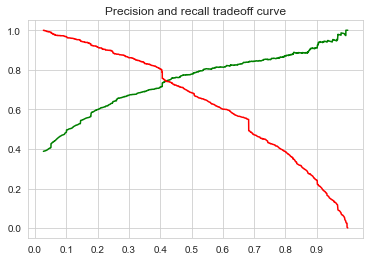

In [301]:
# Plot
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conv_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.title('Precision and recall tradeoff curve')
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

plt.show()


##### Test data metrics

In [302]:
#Test

cutoff_test = 0.40
y_pred_final['Conv_predicted'] = y_pred_final.Conv_prob.map(lambda x: 1 if x > cutoff_test else 0)

accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Conv_predicted)
reca_test = recall_score(y_pred_final.Converted, y_pred_final.Conv_predicted)

# Let's see the sensitivity of our logistic regression model
speci_test = TN / float(TN+FP)

precis_test = precision_score(y_pred_final.Converted, y_pred_final.Conv_predicted)


f_score_test = 2*((precis_test*reca_test)/(precis_test+reca_test))



In [303]:
# Test Data Metrics at cutoff
print('Test Data Metrics at cutoff - ', cutoff_test)
print('\n')
print('Accuracy -               ' , accuracy_test)
print('specificity -            ' , speci_test)
print('Recall / Sensitivity -   ', reca_test)
print('Precision                ', precis_test)

print('F-Score                  ', f_score_test)

Test Data Metrics at cutoff -  0.4


Accuracy -                0.8062846580406654
specificity -             0.8074204946996466
Recall / Sensitivity -    0.8043694141012909
Precision                 0.712401055408971
F-Score                   0.7555970149253731


## Step 11:  Final Model Summary

#####  Final Result Comparison
When Train and Test have the same cutoff value = 0.40

In [304]:
# TRAIN
y_train_predict_prob['Conv_predicted'] = y_train_predict_prob.Conv_Prob.map( lambda x: 1 if x > 0.40 else 0)


accuracy_train = metrics.accuracy_score(y_train_predict_prob.Converted, y_train_predict_prob.Conv_predicted)
speci_train = TN / float(TN+FP)

reca_train = recall_score(y_train_predict_prob.Converted, y_train_predict_prob.Conv_predicted)
precis_train = precision_score(y_train_predict_prob.Converted, y_train_predict_prob.Conv_predicted)

In [305]:
#Test

cutoff_test = 0.40
y_pred_final['Conv_predicted'] = y_pred_final.Conv_prob.map(lambda x: 1 if x > cutoff_test else 0)

accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Conv_predicted)
speci_test = TN / float(TN+FP)

reca_test = recall_score(y_pred_final.Converted, y_pred_final.Conv_predicted)
precis_test = precision_score(y_pred_final.Converted, y_pred_final.Conv_predicted)


In [306]:
# Train Data Metrics at cutoff 
print('Train Data Metrics at cutoff - ', cutoff_test)

print('\n')

print('Accuracy -                 ' , accuracy_train)
print('specificity -              ' , speci_train)

print('Recall / Sensitivity -     ', reca_train)
print('Precision                  ', precis_train)


Train Data Metrics at cutoff -  0.4


Accuracy -                  0.8
specificity -               0.8074204946996466
Recall / Sensitivity -      0.7920133111480865
Precision                   0.714178544636159


In [307]:
# Test Data Metrics at cutoff 

print('Test Data Metrics at cutoff - ', cutoff_test)
print('\n')

print('Accuracy -                ' , accuracy_test)
print('specificity -             ' , speci_test)

print('Recall / Sensitivity -    ', reca_test)
print('Precision                 ', precis_test)

Test Data Metrics at cutoff -  0.4


Accuracy -                 0.8062846580406654
specificity -              0.8074204946996466
Recall / Sensitivity -     0.8043694141012909
Precision                  0.712401055408971


In [308]:
#DELTA
print('difference in accuracy-                ' ,accuracy_train-accuracy_test)
print('difference in recall / Sensitivity-    ' ,reca_train-reca_test)
print('difference in Precision-               ', precis_train-precis_test)

difference in accuracy-                 -0.0062846580406653585
difference in recall / Sensitivity-     -0.01235610295320444
difference in Precision-                0.0017774892271880116


- The Model is working satisfactorily between Train and Test sets for a given cutoff. With less than 2% delta between the results

In [309]:
 #Assign Cutoff value for predicted 
y_pred_final['Conv_predicted'] = y_pred_final.Conv_prob.map(lambda x: 1 if x > 0.40 else 0)

In [310]:
# Display
y_pred_final.head()

,Prospect ID,Converted,Conv_prob,Lead_score_rank,Conv_predicted
0,2712,1,0.244230,24,0
1,8025,1,0.905369,91,1
2,1679,1,0.178321,18,0
3,5109,0,0.146953,15,0
4,4805,0,0.625091,63,1


- From above table, Lead_score_rank is assign to customer and it's conversion probability.
- Using this table the sales team can approach customers and convinced them.

#### When company wish to make the lead conversion more aggressive
- For a period of 2 months every year 10 interns are hired. 
- The sales team with 10 interns allotted to them, they want almost all of the potential leads to be converted.
- Hence, want to make phone calls to as many of such people as possible. 

##### When the Cutoff is adjusted and lowered we can have a high recall value with the tradeoff being that Precision is reduced.

In [311]:
#Test at cutoff = 0.3 or 0.2

cutoff_test = 0.3
y_pred_final['Conv_predicted'] = y_pred_final.Conv_prob.map(lambda x: 1 if x > cutoff_test else 0)

accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Conv_predicted)
reca_test = recall_score(y_pred_final.Converted, y_pred_final.Conv_predicted)

# Let's see the sensitivity of our logistic regression model
speci_test = TN / float(TN+FP)

precis_test = precision_score(y_pred_final.Converted, y_pred_final.Conv_predicted)


f_score_test = 2*((precis_test*reca_test)/(precis_test+reca_test))

In [312]:
# Test Data Metrics at cutoff 

print('Test Data Metrics at cutoff - ', cutoff_test)
print('\n')
print('Accuracy                 ' , accuracy_test)
print('specificity              ' , speci_test)
print('Recall / Sensitivity     ', reca_test)
print('Precision                ', precis_test)

print('F-Score                  ', f_score_test)

Test Data Metrics at cutoff -  0.3


Accuracy                  0.7918669131238447
specificity               0.8074204946996466
Recall / Sensitivity      0.8609731876861966
Precision                 0.672093023255814
F-Score                   0.7548976926425772


In [313]:
 #Assign Cutoff value for predicted model 
y_pred_final['Conv_predicted'] = y_pred_final.Conv_prob.map(lambda x: 1 if x > 0.3 else 0)

In [314]:
# Display
y_pred_final.head()

,Prospect ID,Converted,Conv_prob,Lead_score_rank,Conv_predicted
0,2712,1,0.244230,24,0
1,8025,1,0.905369,91,1
2,1679,1,0.178321,18,0
3,5109,0,0.146953,15,0
4,4805,0,0.625091,63,1


- So at cutoff = 0.3, the model gives recall of 86.09%.
- This would help the sales team & interns to make phone calls more aggressively and more number of leads can be converted.

#### When company reaches its target for a quarter before the deadline
- During this time, the company wants the sales team to focus on some new work 
- So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary
- They want to minimize the rate of useless phone calls.

##### When the Cutoff is adjusted and increased we can have a lower recall value with the tradeoff being that Precision is increased.

In [315]:
#Test at cutoff = 0.6

cutoff_test = 0.6
y_pred_final['Conv_predicted'] = y_pred_final.Conv_prob.map(lambda x: 1 if x > cutoff_test else 0)

accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Conv_predicted)
reca_test = recall_score(y_pred_final.Converted, y_pred_final.Conv_predicted)

# Let's see the sensitivity of our logistic regression model
speci_test = TN / float(TN+FP)

precis_test = precision_score(y_pred_final.Converted, y_pred_final.Conv_predicted)


f_score_test = 2*((precis_test*reca_test)/(precis_test+reca_test))

In [316]:
# Test Data Metrics at cutoff 

print('Test Data Metrics at cutoff - ', cutoff_test)
print('\n')
print('Accuracy                 ' , accuracy_test)
print('specificity              ' , speci_test)
print('Recall / Sensitivity     ', reca_test)
print('Precision                ', precis_test)

print('F-Score                  ', f_score_test)

Test Data Metrics at cutoff -  0.6


Accuracy                  0.8
specificity               0.8074204946996466
Recall / Sensitivity      0.6007944389275075
Precision                 0.8131720430107527
F-Score                   0.6910336950314107


In [317]:
 #Assign Cutoff value for predicted model 
y_pred_final['Conv_predicted'] = y_pred_final.Conv_prob.map(lambda x: 1 if x > 0.6 else 0)

In [318]:
# Display
y_pred_final.head()

,Prospect ID,Converted,Conv_prob,Lead_score_rank,Conv_predicted
0,2712,1,0.244230,24,0
1,8025,1,0.905369,91,1
2,1679,1,0.178321,18,0
3,5109,0,0.146953,15,0
4,4805,0,0.625091,63,1


##### Inferences
- So at cutoff = 0.6, the model gives precision of 81.31%.
- This would help the sales team to focus more on new work and also avoid unnecessary phone calls to make.
- In the above table, Lead_score_rank is assign to customer and using this table the sales team can approach customers.
- Also, they don't have to worry as few of them might already been converted in that quarter.

##### Final Result Comparison

Train & Test Data Metrics at cutoff =  0.4

- Accuracy_train : 80.00% 
- Accuracy_test  : 80.63% 
 

- specificity_train : 80.74%
- specificity_test  : 80.74%

- Recall / Sensitivity_train : 79.20%
- Recall / Sensitivity_test  : 80.44%


- Precision_train  : 71.42%
- Precision _test  : 71.24%


Target lead Conversion rate on the final predicted model are as expected by CEO of X Education should be around 80% :

- Train Conversion Rate  : 79.20%
- Test Conversion Rate   : 80.44%

#### This seems to be good model. So let's  generalize various datasets.

##### FINAL REPORT

As per our final Model, the top 3 predictor variables that contributes the most towards the probability of a lead getting converted :

1. Total Time Spent on Website: A coefficient value of 4.4860.

2. What is your current occupation_Working Professional: A coefficient value of 3.4368.

3. Lead Source_Reference: A coefficient value of 2.5905


The X Education should focus on the above variables as the leads from them are most likely to convert into paying customers. The sales team should start concentrating on potential leads by attracting them:
- Brief information provided to potential customers on new courses, job offers and future higher studies.
- To conduct one-on-one appointments with them to understand their needs and intention to join the course.
- You can connect them to your alumni for explicit discussion and help them to clear their doubts regarding the course. 
- By interacting with them and understanding their needs and making a tailored information according to the customer could help in converting the customer. 


##### NOTE:

The details of `Total Time Spent on Website, What is your current occupation_Working Professional, Lead Source_Reference`.

- Total Time Spent on Website: The total time spent by the customer on the website.
- What is your current occupation_Working Professional : Indicates whether the customer is a student, umemployed or employed.
- Lead Source_Reference : The source of the lead.

